# CVRP Swap Improvement — Boxplots

このノートは、`iteration_*_swap_timings.json`（各スワップのログ）から、  
**交換前/後の重心距離合計の比率**（`sum_after / sum_before`）を集計して**箱ひげ図**で可視化します。

- 1 未満 → 改善（短縮）
- 1 以上 → 悪化（増加）

---
**使い方**

1. `BASE_DIRS` に解析したいディレクトリ（例：`/home/.../out/ex7`）を追加  
   ※ もし単発ファイルだけを試す場合、`SINGLE_FILES` にパスを入れてもOK  
2. 下のセルを順番に実行


In [17]:
import os, json, glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# ===== 設定 =====
# 解析したいディレクトリを追加（必要に応じて編集してください）
BASE_DIRS = [
    "/home/toshiya1048/dev/QA_knap/out/ex8"
]

# 単発ファイル（実験用）: iteration_*_swap_timings.json への絶対パスを入れる
SINGLE_FILES = [
    "/mnt/data/iteration_1_swap_timings.json",  # アップロードされた例
]

# 出力先（画像保存）
PLOT_DIR = Path("/home/toshiya1048/dev/QA_knap/out/ex8")
PLOT_DIR.mkdir(parents=True, exist_ok=True)

# グラフのフォントなど（色やスタイルの指定はしない）
plt.rcParams['figure.figsize'] = (8, 5)


In [18]:
# def find_swap_files(base_dirs, single_files):
#     files = []
#     for b in base_dirs:
#         b = str(b)
#         files.extend(glob.glob(os.path.join(b, "**", "iteration_*_swap_timings.json"), recursive=True))
#     for f in single_files:
#         if os.path.isfile(f):
#             files.append(f)
#     return sorted(set(files))

# def parse_instance_from_path(path_str: str) -> str:
#     p = Path(path_str)
#     par = p.parent.name
#     if par.endswith("_before_data"):
#         return par.replace("_before_data", "")
#     return par

# def parse_iteration_from_filename(path_str: str) -> int:
#     stem = Path(path_str).stem
#     try:
#         return int(stem.split("_")[1])
#     except Exception:
#         return -1

# def load_rows(files):
#     rows = []
#     for f in files:
#         try:
#             with open(f, "r") as fh:
#                 data = json.load(fh)
#         except Exception as e:
#             print(f"[warn] failed to load {f}: {e}")
#             continue
#         for rec in (data if isinstance(data, list) else []):
#             before = rec.get("sum_dist_current_before", None)
#             after  = rec.get("sum_dist_current_after", None)
#             if before is None or after is None:
#                 continue
#             try:
#                 before = float(before)
#                 after  = float(after)
#             except Exception:
#                 continue
#             if before <= 0:
#                 continue
#             ratio = after / before
#             rows.append({
#                 "file": f,
#                 "instance": parse_instance_from_path(f),
#                 "iteration": parse_iteration_from_filename(f),
#                 "swap_index": rec.get("swap_index", None),
#                 "from_cluster": rec.get("from_cluster", None),
#                 "to_cluster": rec.get("to_cluster", None),
#                 "ratio": ratio,
#                 "before": before,
#                 "after": after,
#             })
#     import pandas as pd
#     return pd.DataFrame(rows)

# def plot_box_by_instance_iteration(df):
#     if df.empty:
#         print("データがありません。")
#         return []
#     saved = []
#     for (inst, it), sub in df.groupby(["instance", "iteration"]):
#         vals = sub["ratio"].dropna().values
#         if len(vals) == 0:
#             continue
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         ax.boxplot(vals, showfliers=True)
#         ax.set_title(f"{inst} — iteration {it}: ratio (sum_after / sum_before)")
#         ax.set_ylabel("ratio (lower is better)")
#         ax.set_xticks([1])
#         ax.set_xticklabels([f"{inst}-it{it}"])
#         ax.grid(True)
#         fig.tight_layout()
#         out = PLOT_DIR / f"box_{inst}_iter{it}.png"
#         fig.savefig(out, dpi=200)
#         plt.show()
#         saved.append(str(out))
#     return saved

# def plot_box_by_instance_aggregated(df):
#     if df.empty:
#         return None
#     instances = []
#     data = []
#     for inst, sub in df.groupby("instance"):
#         vals = sub["ratio"].dropna().values
#         if len(vals) == 0:
#             continue
#         instances.append(inst)
#         data.append(vals)
#     if not data:
#         return None
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.boxplot(data, showfliers=True)
#     ax.set_title("Aggregated by instance: ratio (sum_after / sum_before)")
#     ax.set_ylabel("ratio (lower is better)")
#     ax.set_xticks(range(1, len(instances)+1))
#     ax.set_xticklabels(instances, rotation=20)
#     ax.grid(True)
#     fig.tight_layout()
#     out = PLOT_DIR / "box_aggregated_by_instance.png"
#     fig.savefig(out, dpi=200)
#     plt.show()
#     return str(out)


検出ファイル数: 39
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_1_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_2_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_3_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_4_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_5_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_6_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_012735/Leuven2_before_data/iteration_7_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_044832/E-n51-k5_before_data/iteration_1_swap_timings.json
 - /home/toshiya1048/dev/QA_knap/out/ex8/20251109_044832/E-n51-k5_before_data/iteration_2_swap_timings.json
 - /home/toshiya1048/de

,file,instance,iteration,swap_index,from_cluster,to_cluster,ratio,before,after
0,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,0,25,24,0.847053,6181.991876,5236.476357
1,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,4,45,2,0.780223,4082.797259,3185.491693
2,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,5,2,34,0.849887,4910.072043,4173.006808
3,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,7,5,19,1.000852,4127.235450,4130.753791
4,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,15,15,33,0.763811,3400.376479,2597.244653
5,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,22,4,30,1.000000,3852.452982,3852.452982
6,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,24,12,43,0.812015,8776.918834,7126.991354
7,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,27,39,13,0.927563,20831.051138,19322.107542
8,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,29,23,17,0.780933,5753.995744,4493.484970
9,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,32,32,18,0.880062,6157.049691,5418.586161


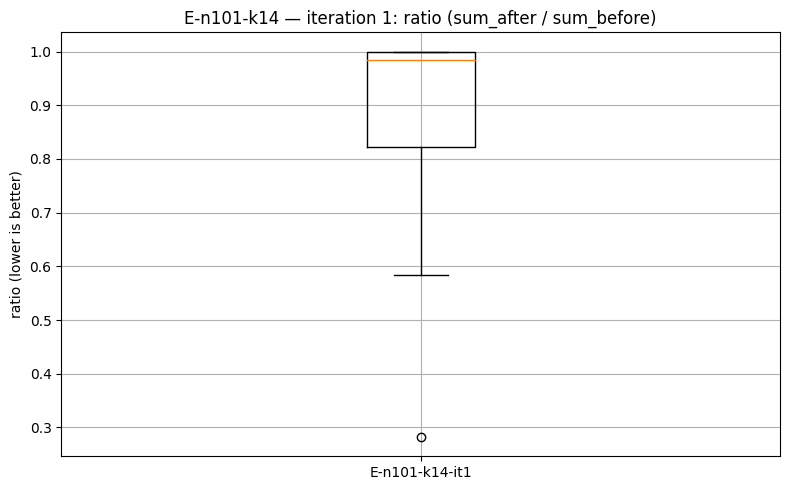

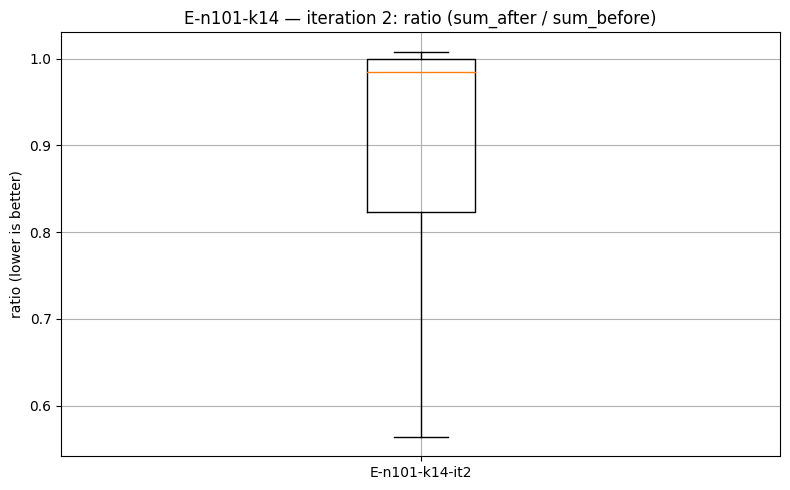

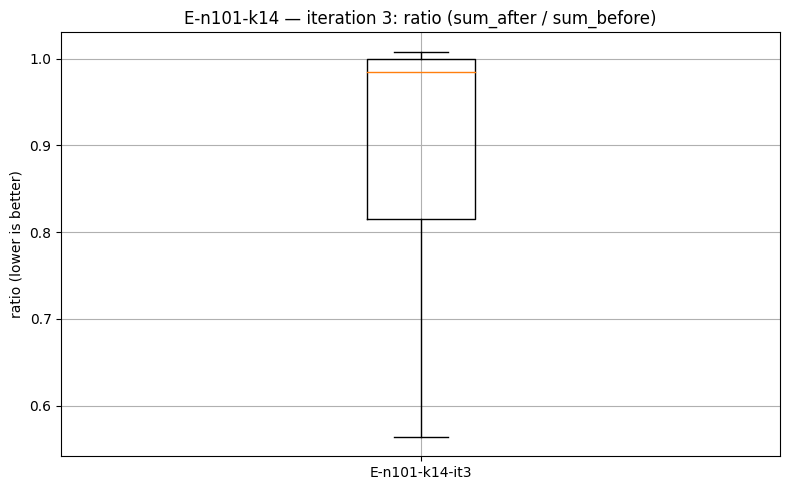

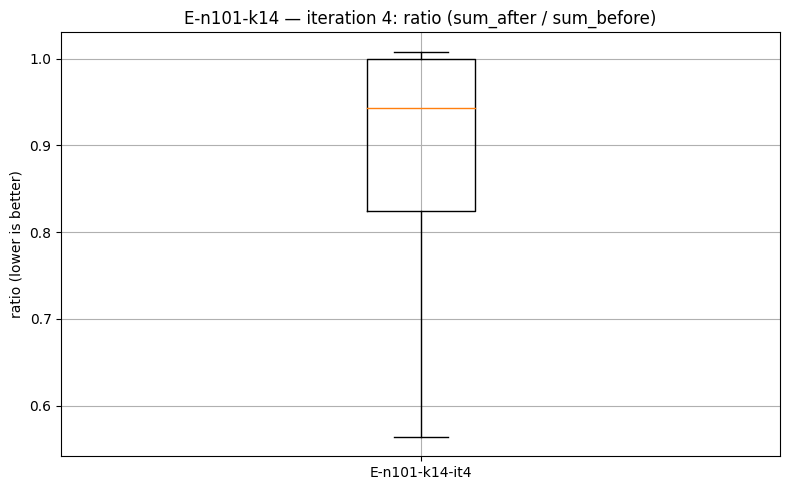

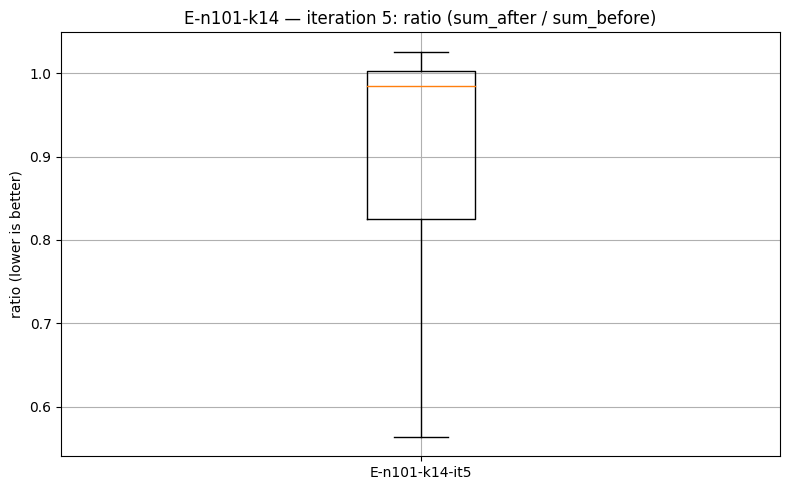

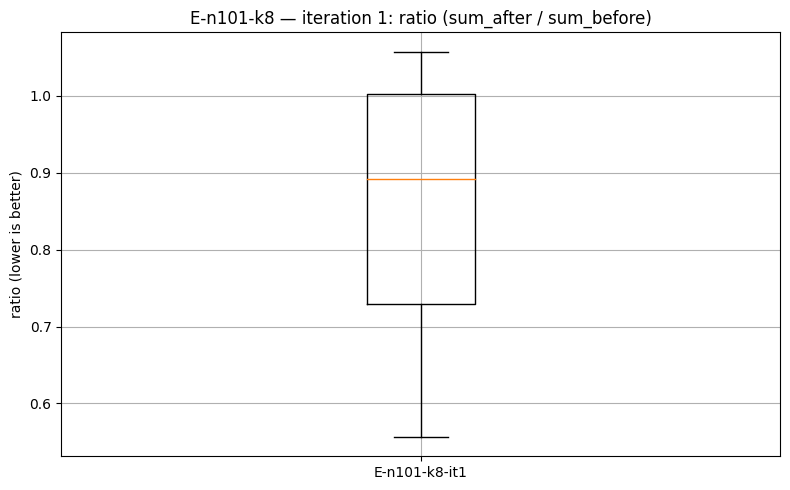

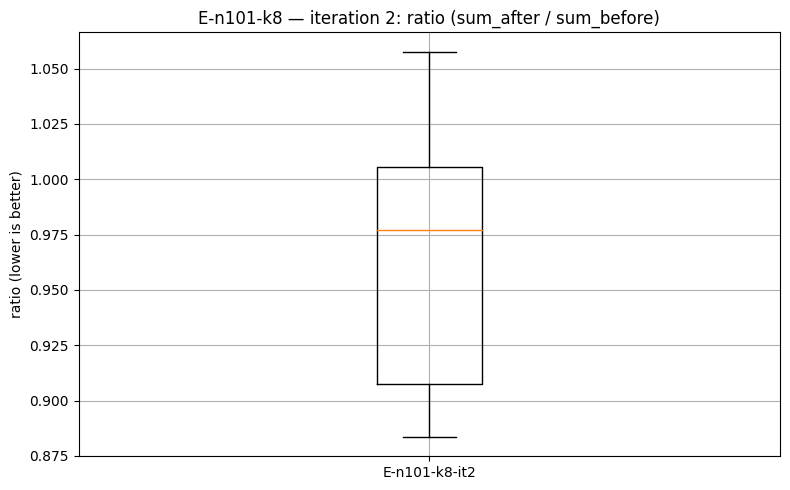

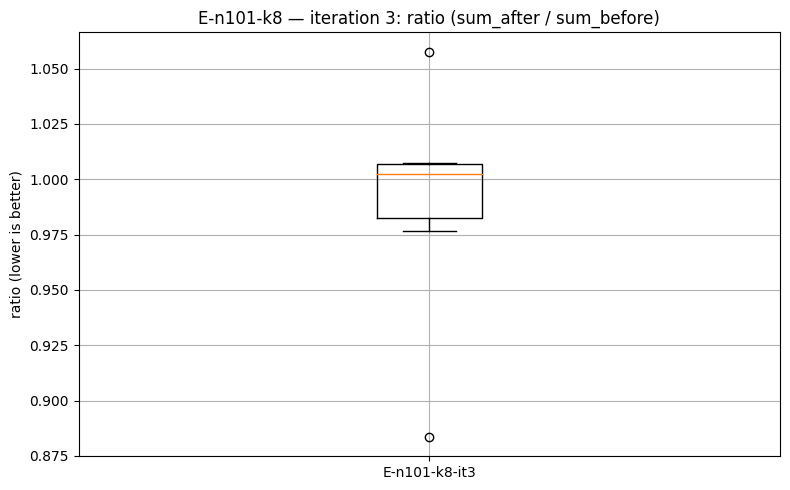

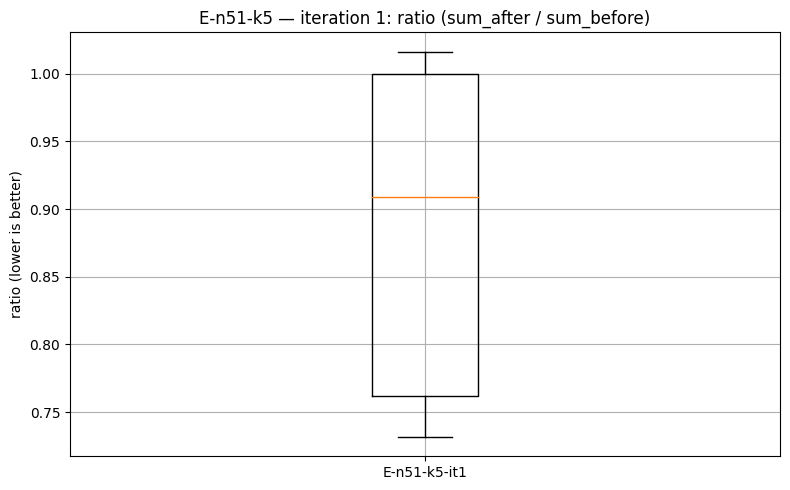

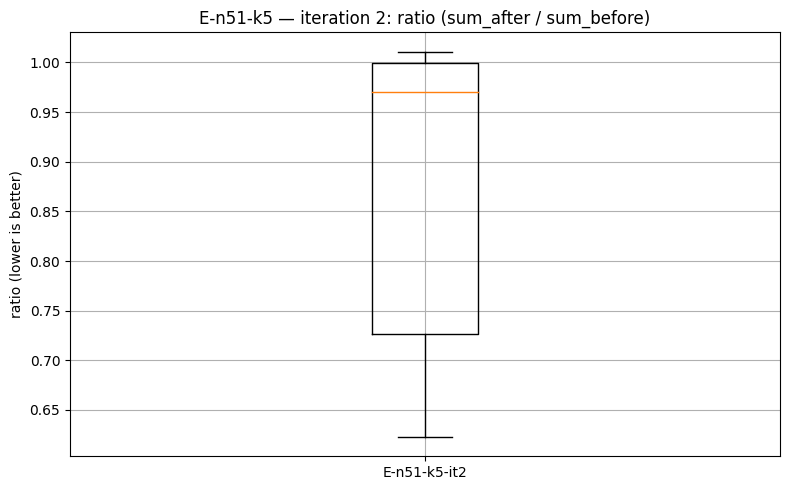

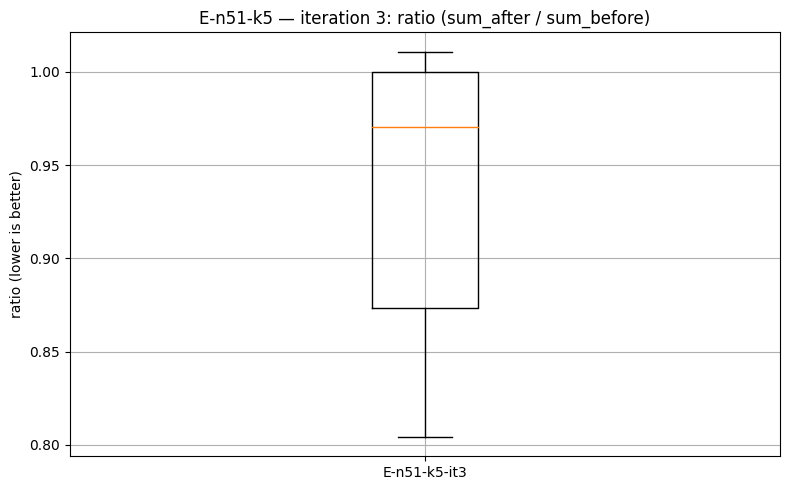

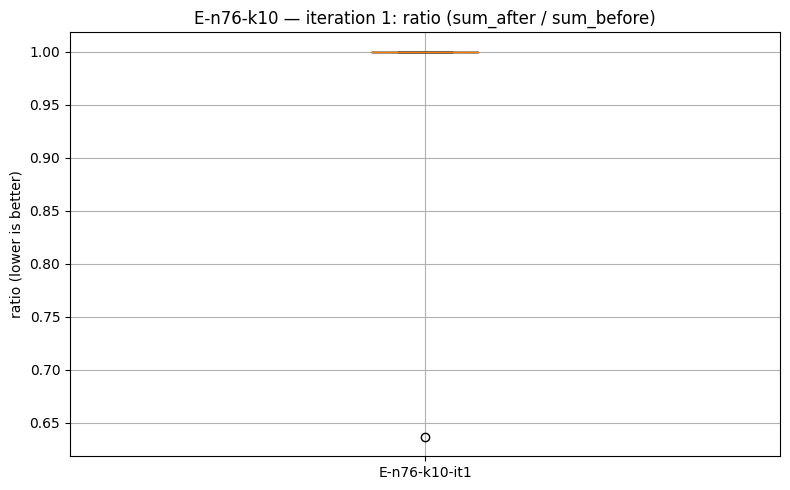

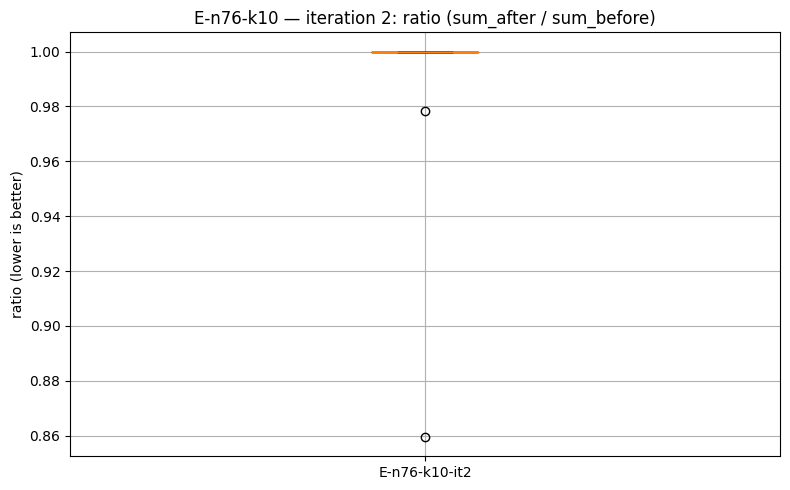

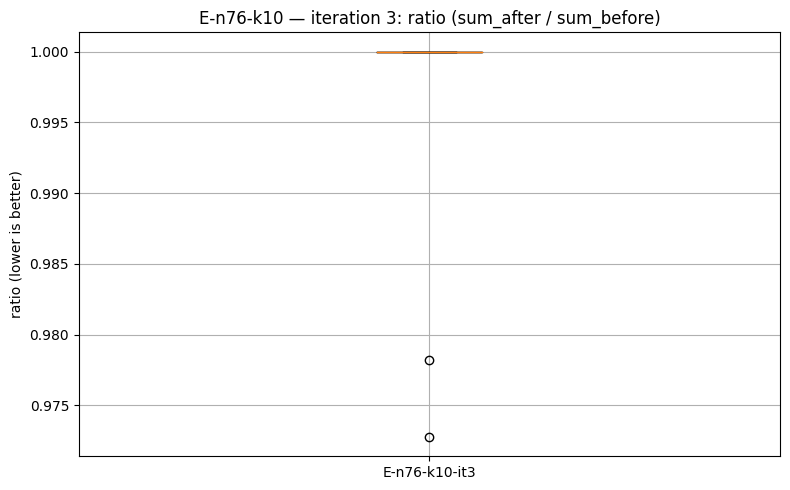

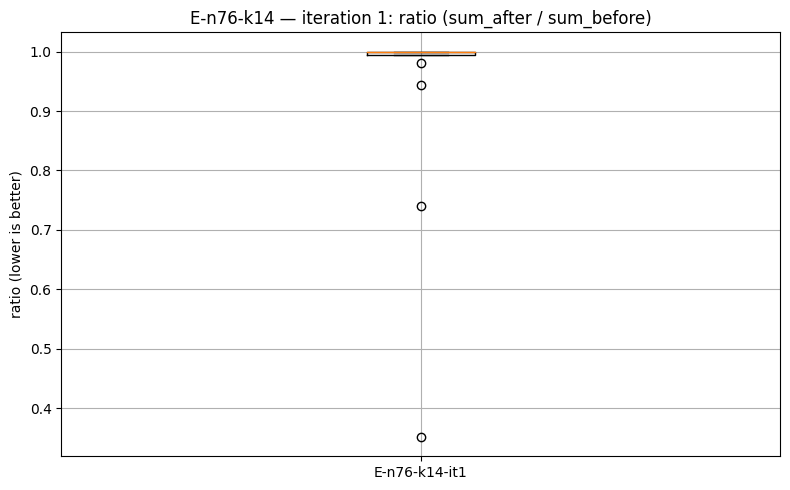

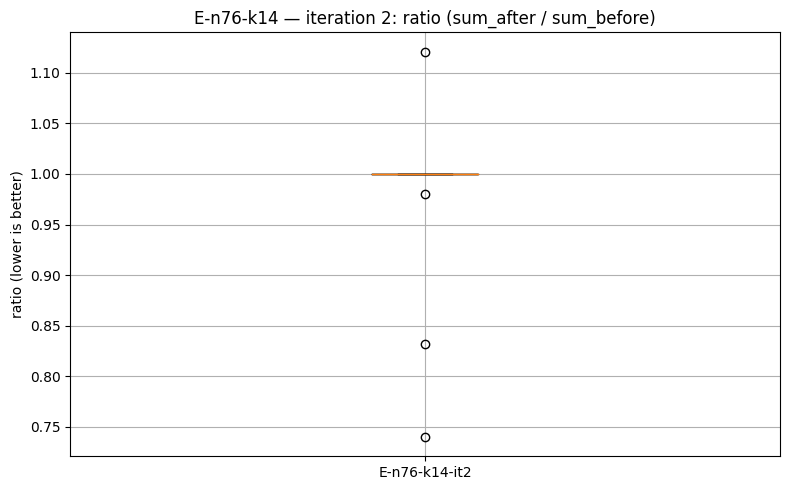

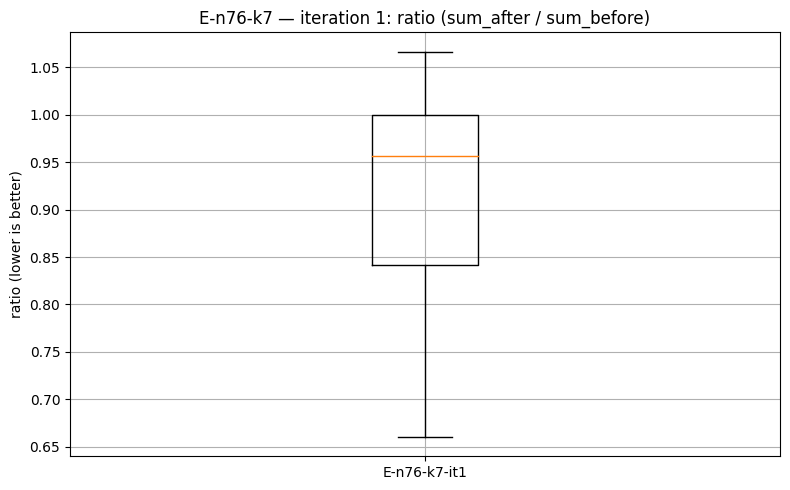

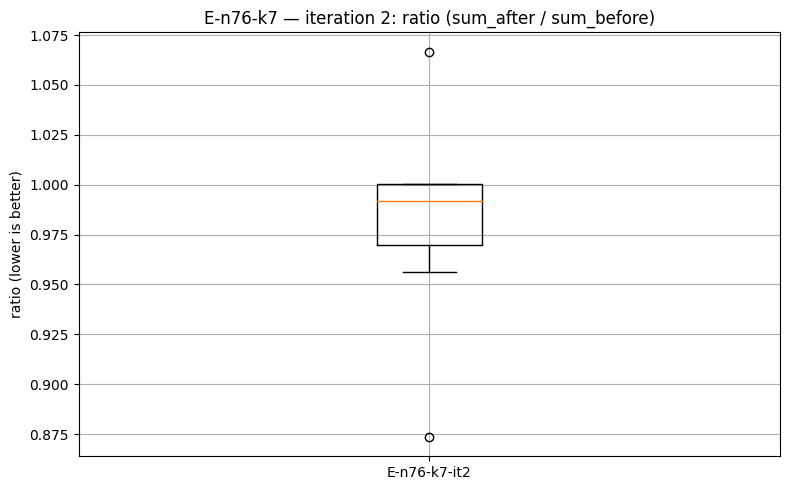

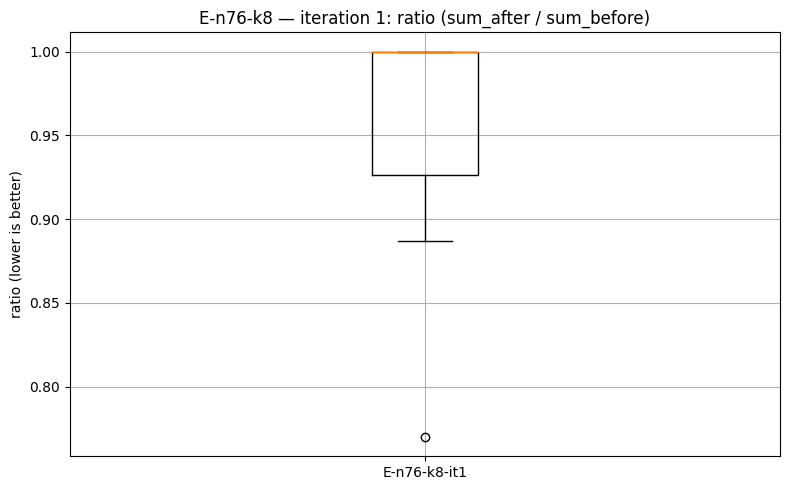

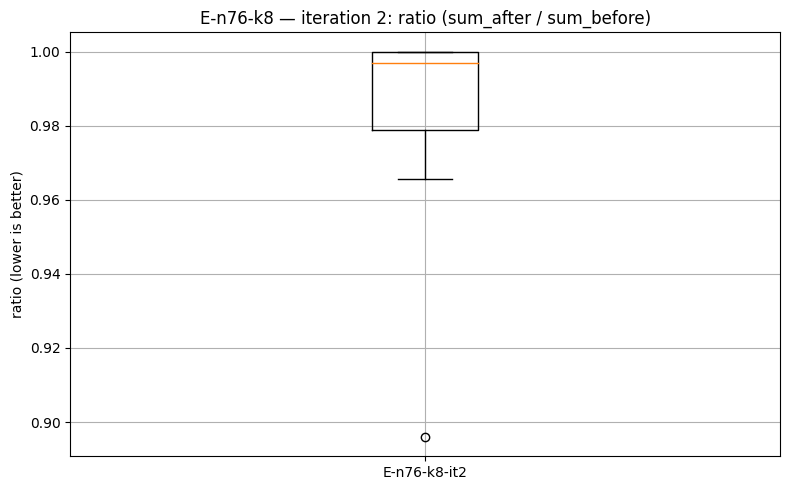

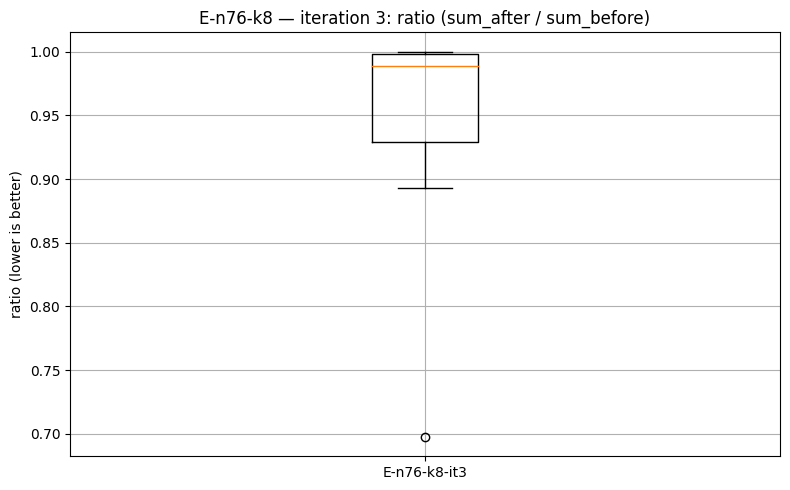

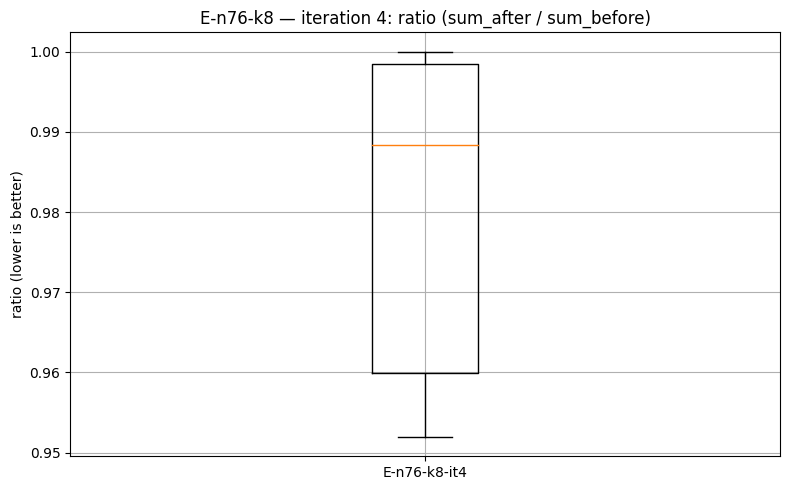

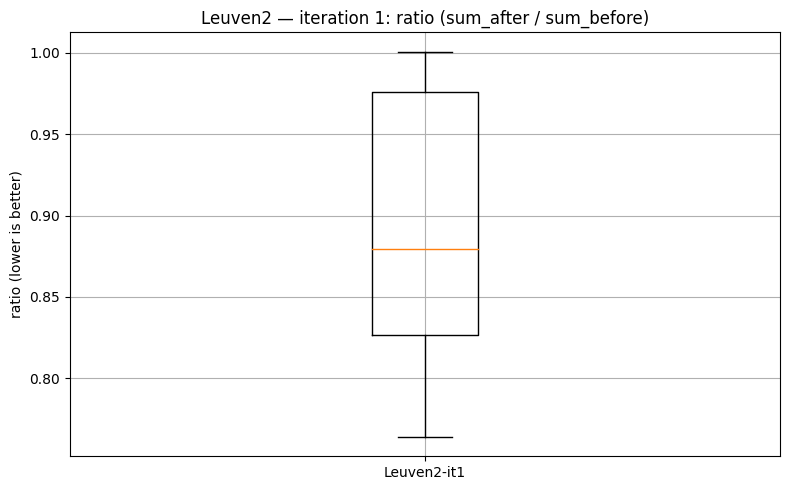

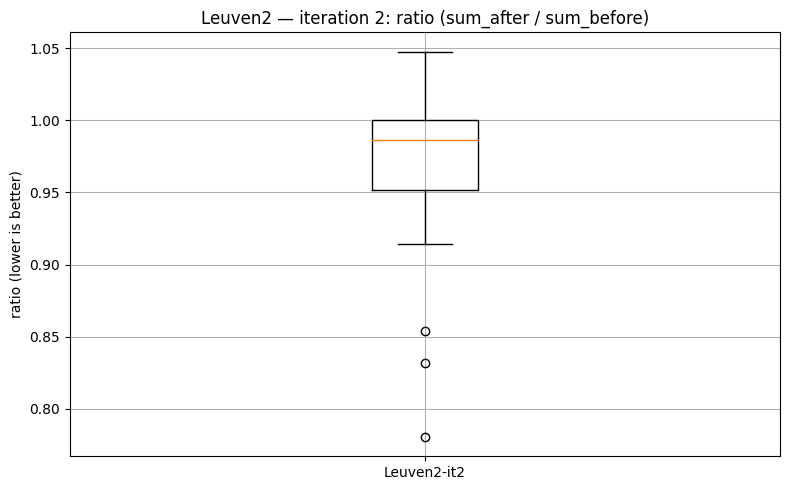

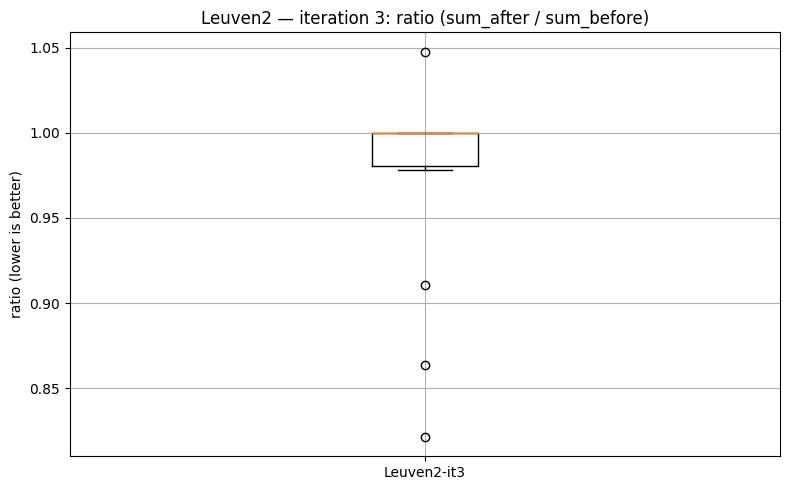

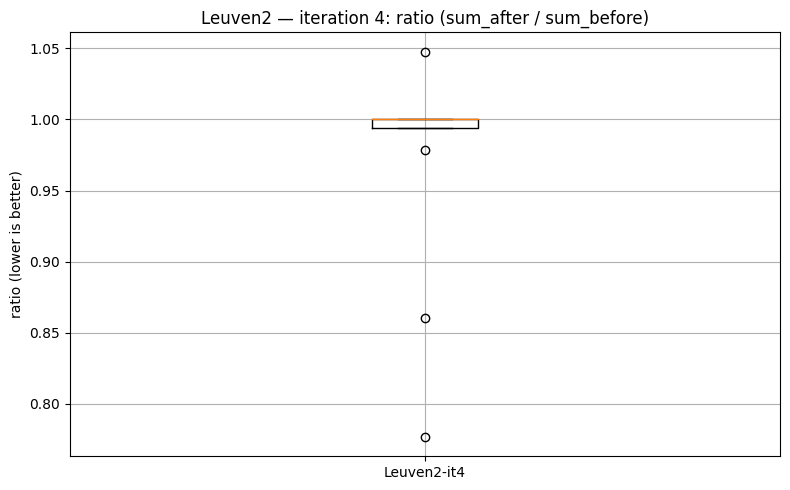

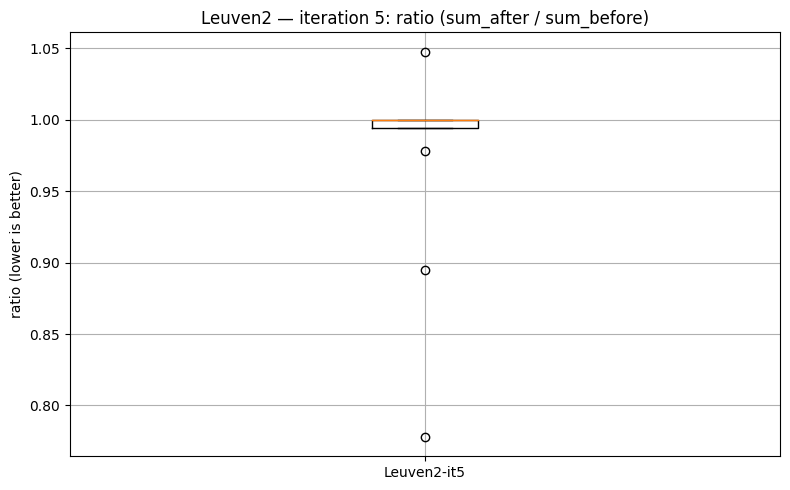

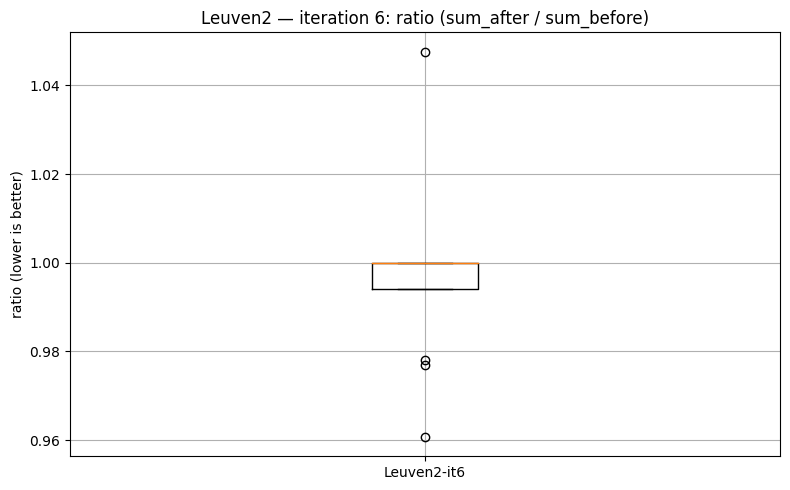

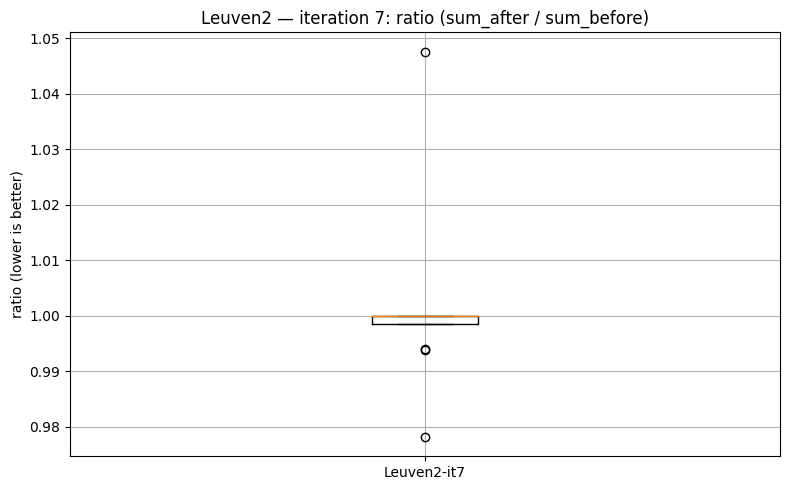

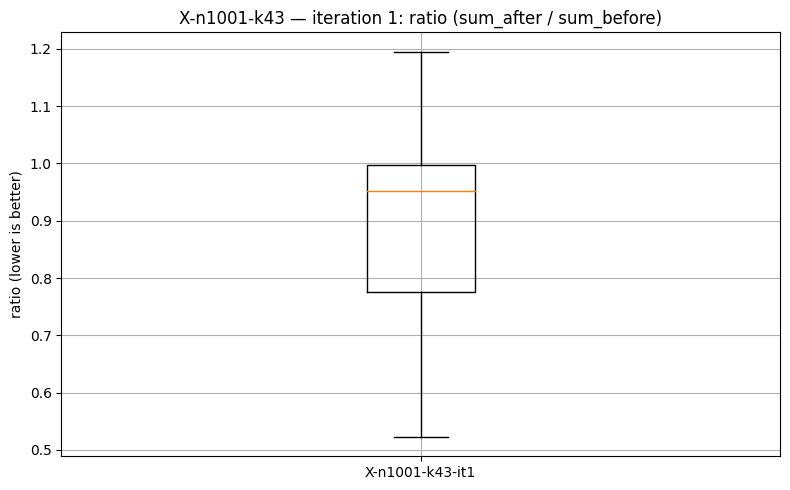

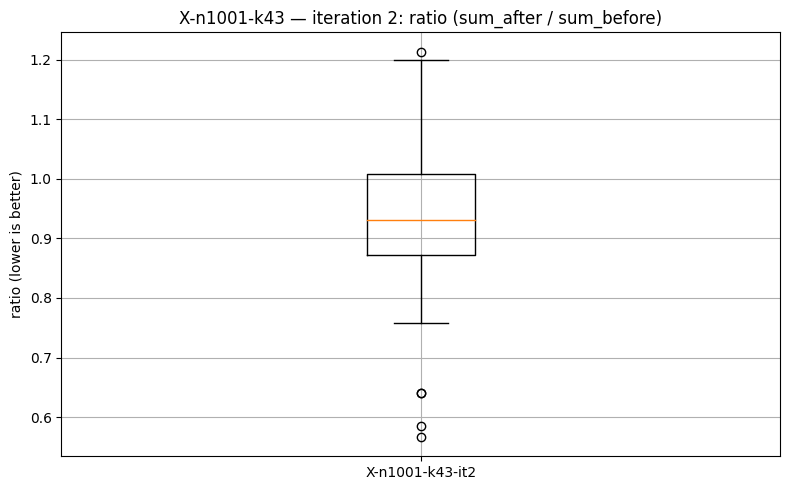

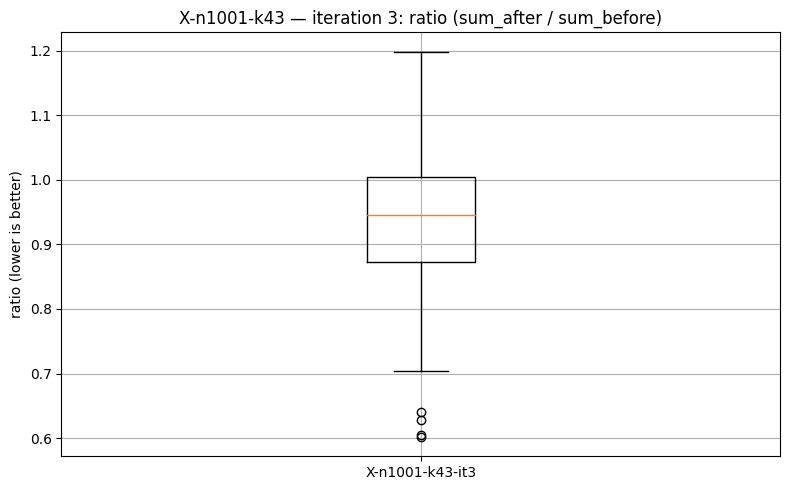

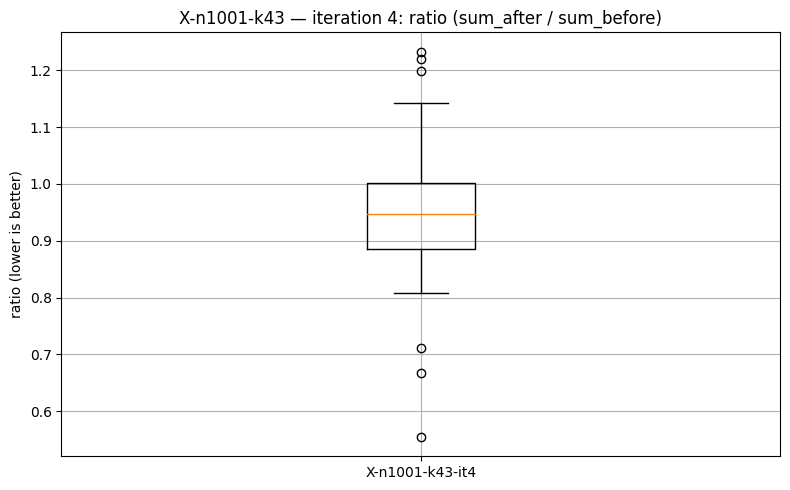

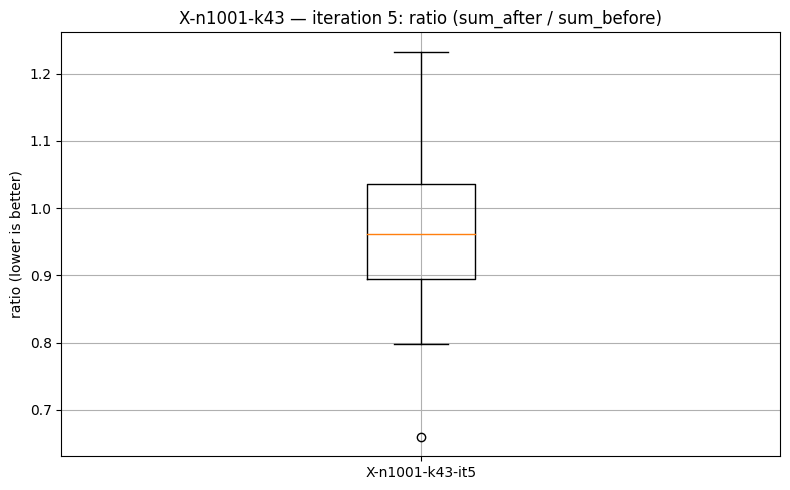

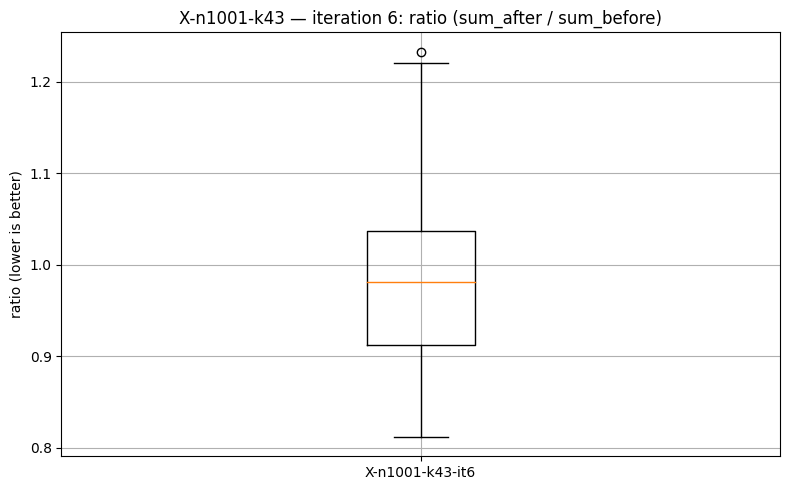

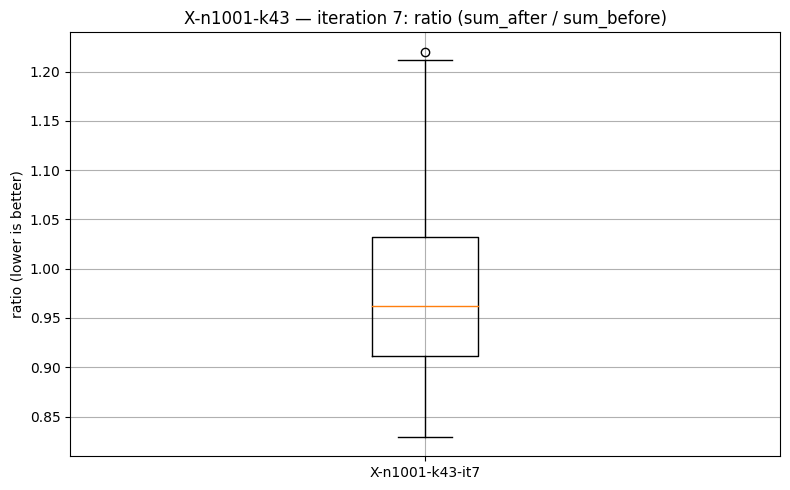

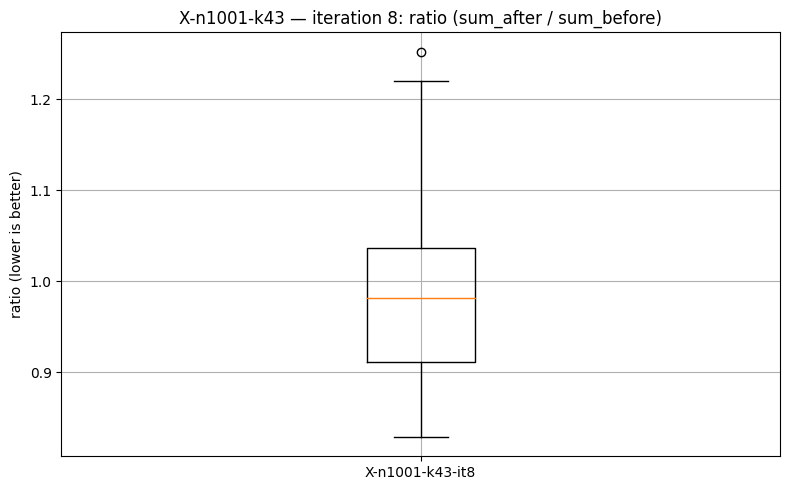

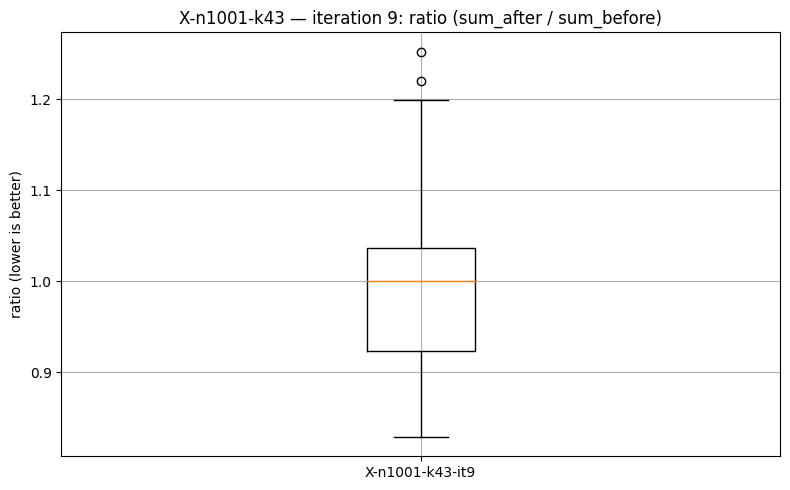

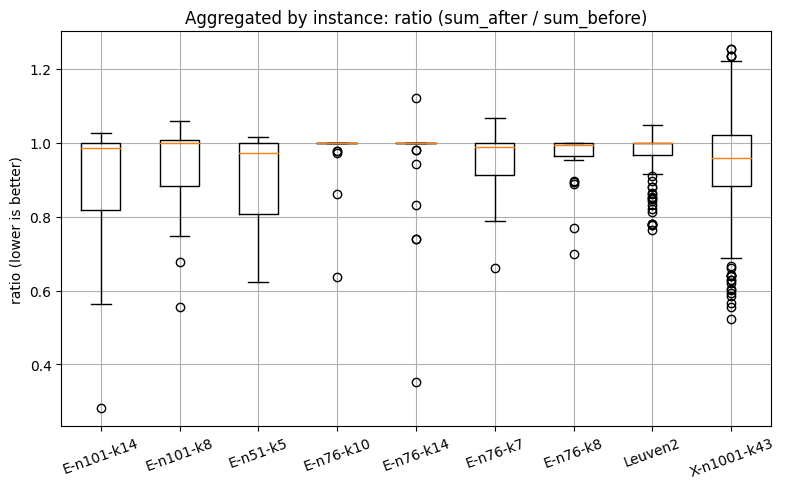


Saved figures:
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k14_iter1.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k14_iter2.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k14_iter3.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k14_iter4.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k14_iter5.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k8_iter1.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k8_iter2.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n101-k8_iter3.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n51-k5_iter1.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n51-k5_iter2.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n51-k5_iter3.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n76-k10_iter1.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n76-k10_iter2.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n76-k10_iter3.png
 - /home/toshiya1048/dev/QA_knap/out/ex8/box_E-n76-k14_iter1.png
 - /hom

In [19]:
files = find_swap_files(BASE_DIRS, SINGLE_FILES)
print("検出ファイル数:", len(files))
for f in files:
    print(" -", f)

df = load_rows(files)
print("行数:", len(df))
try:
    from caas_jupyter_tools import display_dataframe_to_user
    display_dataframe_to_user("swap_ratios_preview", df)
except Exception:
    display(df.head(10))

saved_per_iter = plot_box_by_instance_iteration(df)
saved_agg = plot_box_by_instance_aggregated(df)

print("\nSaved figures:")
for s in saved_per_iter:
    print(" -", s)
if saved_agg:
    print(" -", saved_agg)


In [ ]:
# ==== Clean bars: timestamp×instanceで分離し、移動ありクラスタのみ、最終no-move iterは除外 ====
import os, glob, json, re
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE = "/home/toshiya1048/dev/QA_knap/out/ex8"
PLOT_DIR = Path("/home/toshiya1048/dev/QA_knap/out/ex8")
PLOT_DIR.mkdir(parents=True, exist_ok=True)


CAND_BEFORE = [
    "sum_dist_current_before","sum_before","sum_dist_before",
    "sum_city_to_centroid_before","sum_cluster_centroid_distance_before"
]
CAND_AFTER  = [
    "sum_dist_current_after","sum_after","sum_dist_after",
    "sum_city_to_centroid_after","sum_cluster_centroid_distance_after"
]

def pick(d, keys):
    for k in keys:
        if k in d and d[k] is not None:
            return d[k]
    return None

def parse_meta(fp: str):
    p = Path(fp)
    m = re.search(r"iteration_(\d+)_swap_timings\.json$", p.name)
    it = int(m.group(1)) if m else -1
    inst = re.sub(r"_before_data$", "", p.parent.name)
    ts   = p.parent.parent.name
    return ts, inst, it

def moved_bool(rec) -> bool:
    # moved_indices が 0/1配列なら合計>0で移動あり
    mi = rec.get("moved_indices")
    if isinstance(mi, (list, tuple)):
        try:
            return np.sum(np.array(mi, dtype=float)) > 0
        except Exception:
            pass
    # 直接 moved_count があれば使う
    if "moved_count" in rec:
        try:
            return float(rec["moved_count"]) > 0
        except Exception:
            pass
    # その他のヒントが無ければ False
    return False

# 1) 全 swap_timings を読み込んで tidy に
rows = []
files = sorted(glob.glob(os.path.join(BASE, "**", "iteration_*_swap_timings.json"), recursive=True))
print("検出ファイル数:", len(files))
for f in files:
    ts, inst, it = parse_meta(f)
    try:
        data = json.load(open(f))
    except Exception as e:
        print("[load warn]", f, e); 
        continue
    if not isinstance(data, list):
        continue

    for rec in data:
        # スキップは棒から除外したいのでフラグ保持
        skipped = bool(rec.get("skipped", False))
        # before/after が無い行は比率計算に使わない（=見にくさの元なので除外）
        b = pick(rec, CAND_BEFORE)
        a = pick(rec, CAND_AFTER)
        if b is None or a is None:
            continue
        try:
            b = float(b); a = float(a)
        except Exception:
            continue
        if b <= 0:
            continue

        ratio = a / b
        # 微小誤差を 1.0 に吸着
        if abs(ratio - 1.0) < 1e-9:
            ratio = 1.0

        rows.append({
            "timestamp": ts,
            "instance": inst,
            "iteration": it,
            "from_cluster": rec.get("from_cluster"),
            "ratio": ratio,
            "skipped": skipped,
            "moved": moved_bool(rec)
        })

df = pd.DataFrame(rows)
print("読み込み行数:", len(df))
display(df.head(3))

if df.empty:
    raise SystemExit("データが空です。swap_timings の書式とパスを確認してください。")

# 2) timestamp×instance で完全分離して出力
for (ts, inst), sub0 in df.groupby(["timestamp","instance"], sort=False):
    # (a) スキップ行は除外、(b) moved==True の行だけ
    sub = sub0[(sub0["skipped"] == False) & (sub0["moved"] == True)].copy()

    if sub.empty:
        print(f"[{inst} @ {ts}] 移動ありの記録がないためスキップ")
        continue

    # その run の最終イテレーションを確認
    final_it = sub0["iteration"].max()

    # “最終イテレーションが no-move（全て1.0 or moved False）なら描かない”
    # moved True だけで集めているため、単純に sub の中に final_it が存在しなければ no-move とみなして除外
    moved_its = set(sub["iteration"].unique().tolist())
    if final_it not in moved_its:
        print(f"[{inst} @ {ts}] 最終iter={final_it} は no-move と判定 → プロット対象外")

    # プロット対象のイテレーションだけループ（final_it が no-move なら自然と含まれない）
    for it, s in sub.groupby("iteration", sort=True):
        g = s.groupby("from_cluster")["ratio"].mean().sort_index()
        if g.empty:
            continue
        # 1.0 をクリップ（描画上のブレ対策）
        g = g.clip(lower=0.0, upper=2.0)  # 上限は適当に
        fig, ax = plt.subplots(figsize=(9,5))
        ax.bar(g.index.astype(str), g.values)
        ax.axhline(1.0, linestyle="--", linewidth=1)
        ax.set_title(f"{inst} — {ts} — iter {it}: ratio per cluster (moved clusters only)")
        ax.set_xlabel("from_cluster")
        ax.set_ylabel("ratio (after / before)")
        ax.grid(True, axis="y")
        fig.tight_layout()
        out = OUT / f"bars_clean_{inst}_{ts}_iter{it}.png"
        fig.savefig(out, dpi=200)
        plt.show()
        print("💾", out)


NameError: name 'OUT' is not defined

検出ファイル数: 39
行数: 651


,file,instance,iteration,swap_index,from_cluster,to_cluster,ratio,before,after
0,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,0,25,24,0.847053,6181.991876,5236.476357
1,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,4,45,2,0.780223,4082.797259,3185.491693
2,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,5,2,34,0.849887,4910.072043,4173.006808
3,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,7,5,19,1.000852,4127.235450,4130.753791
4,/home/toshiya1048/dev/QA_knap/out/ex8/20251109...,Leuven2,1,15,15,33,0.763811,3400.376479,2597.244653


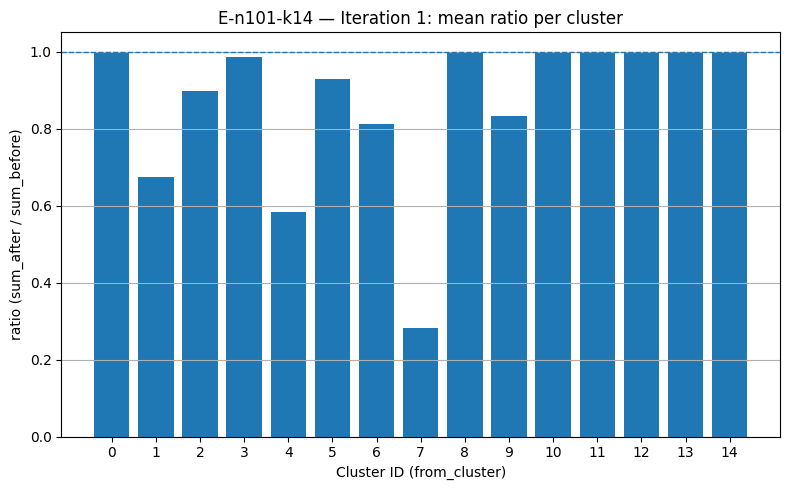

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter1.png


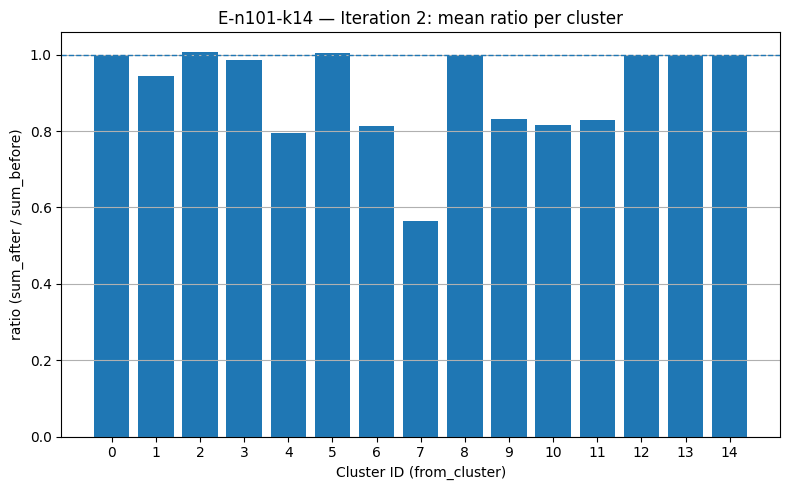

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter2.png


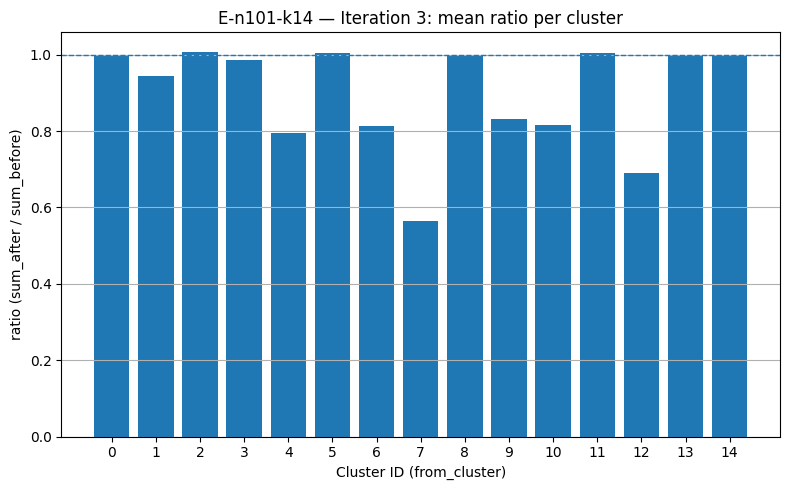

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter3.png


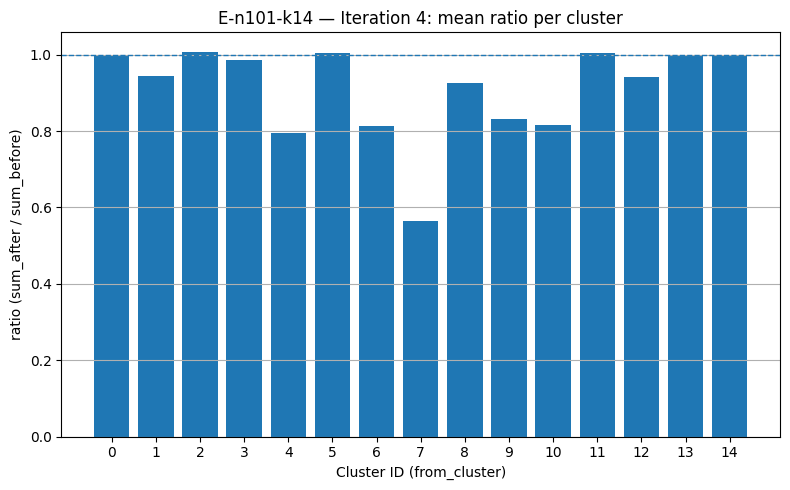

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter4.png


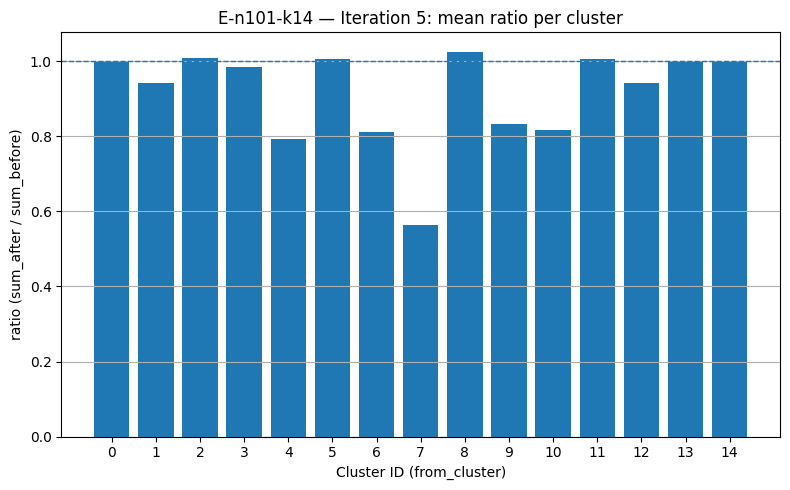

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter5.png


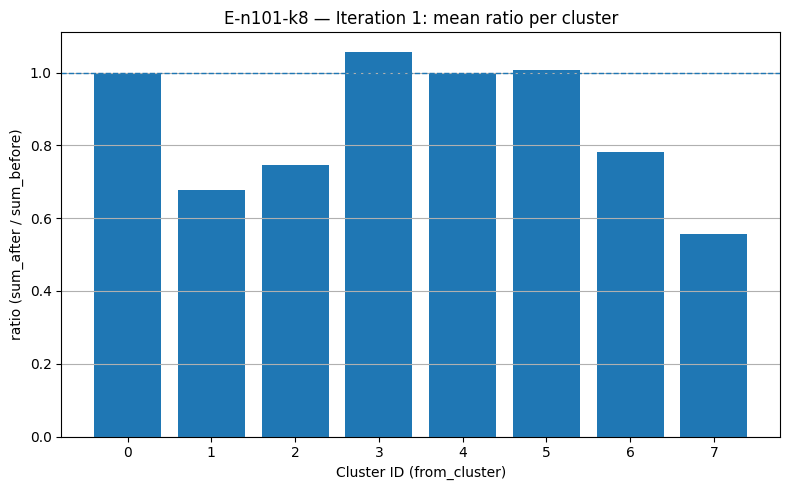

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter1.png


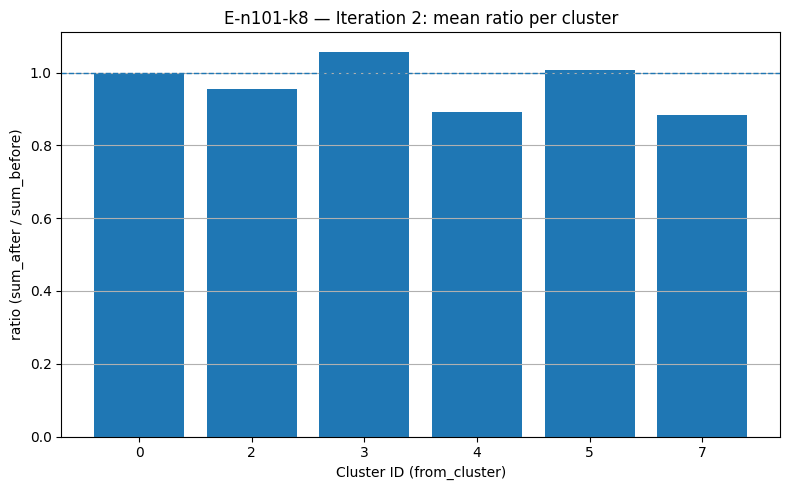

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter2.png


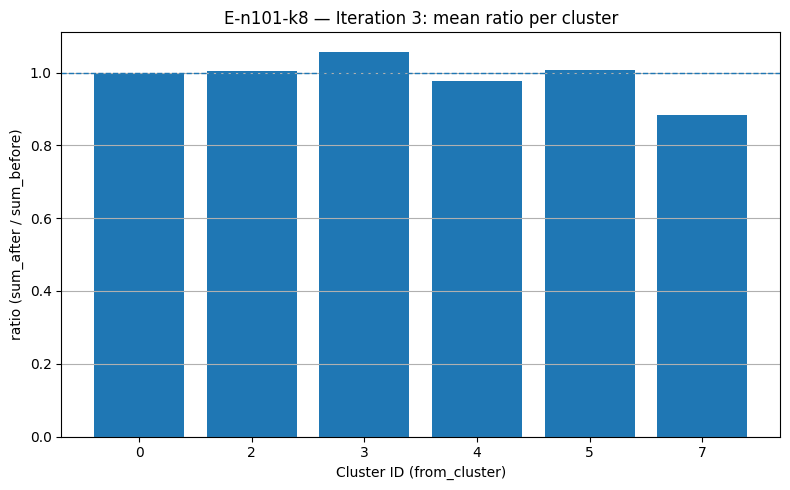

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter3.png


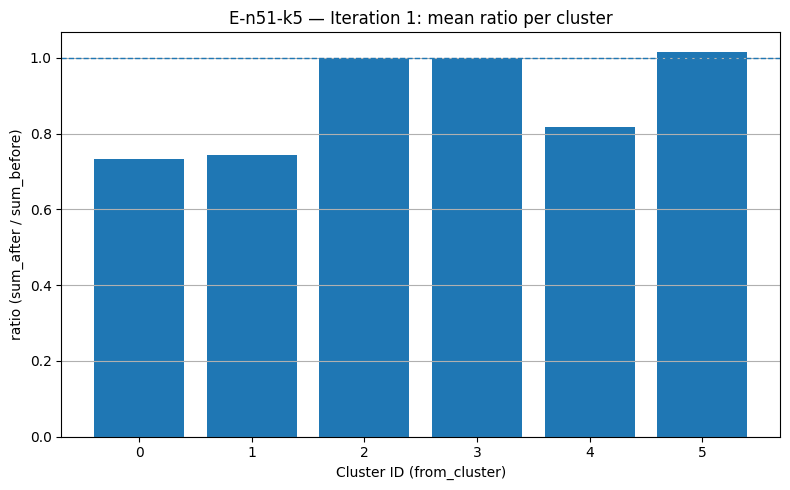

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter1.png


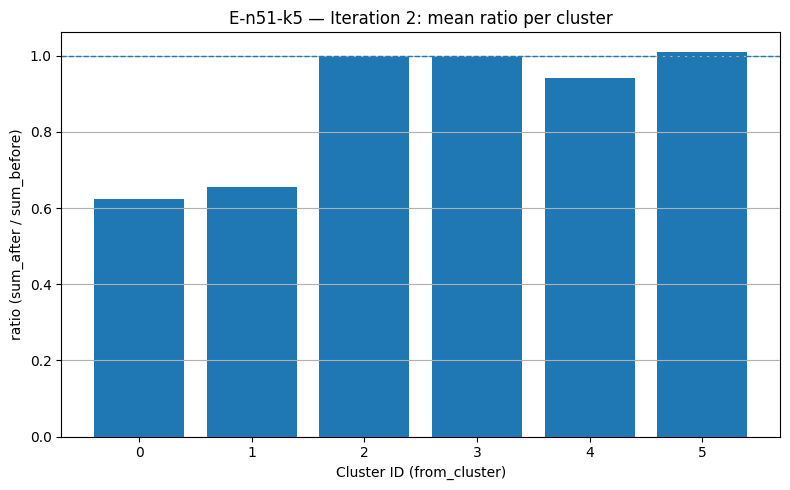

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter2.png


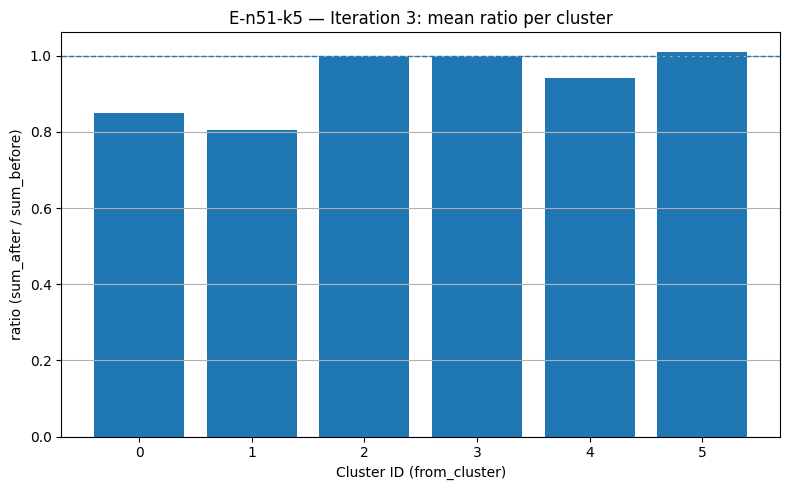

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter3.png


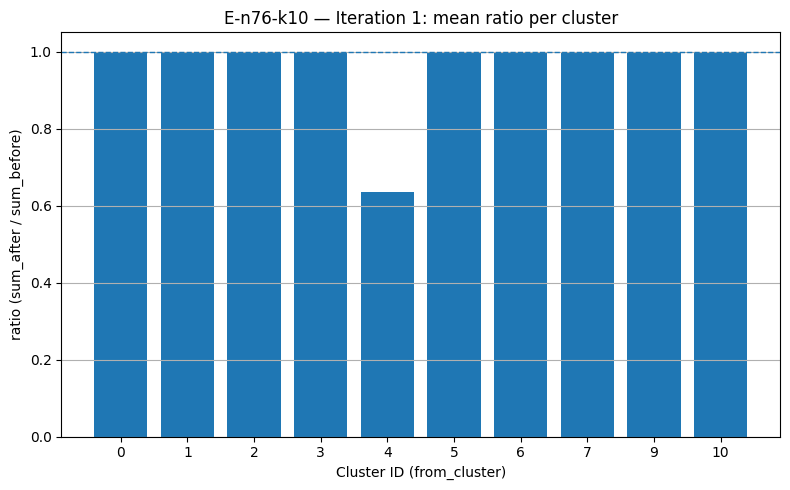

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter1.png


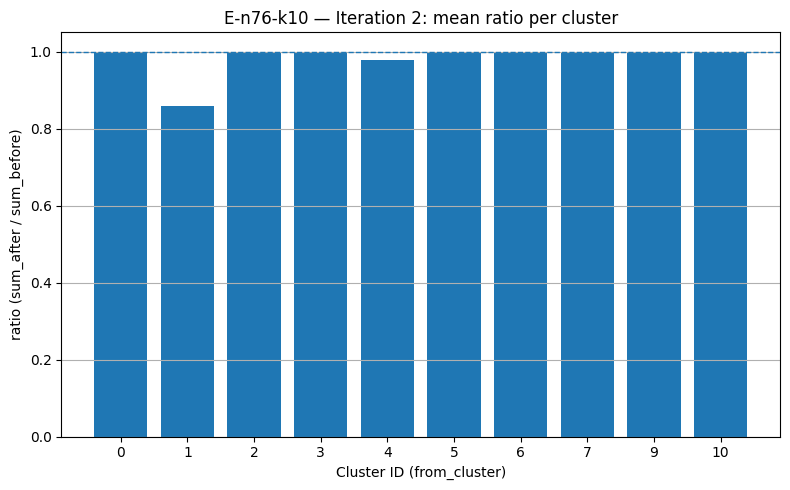

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter2.png


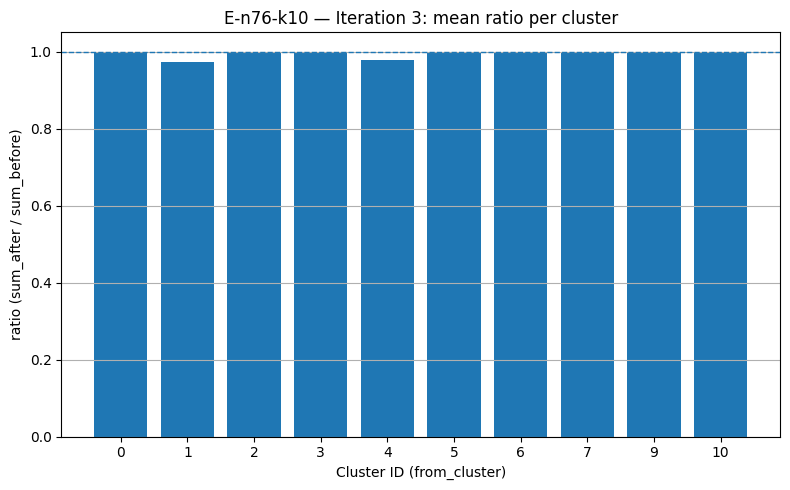

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter3.png


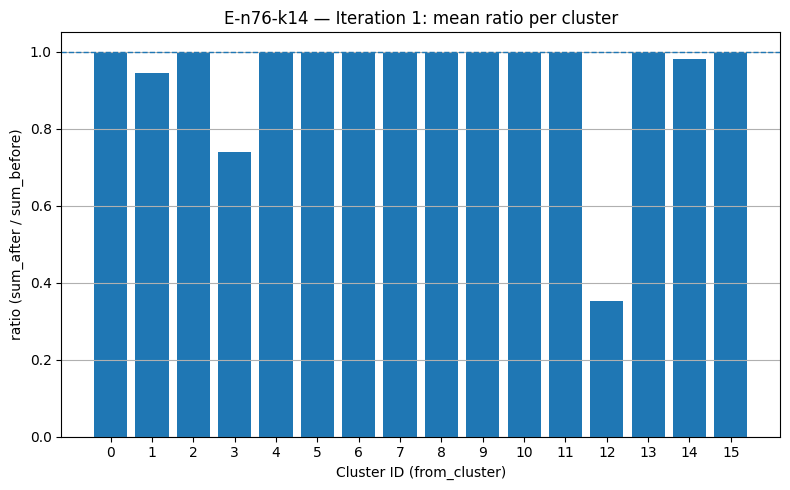

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k14_iter1.png


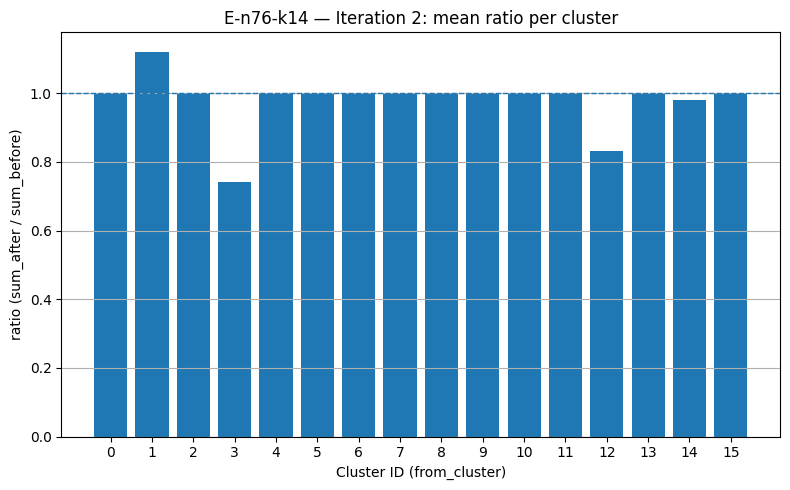

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k14_iter2.png


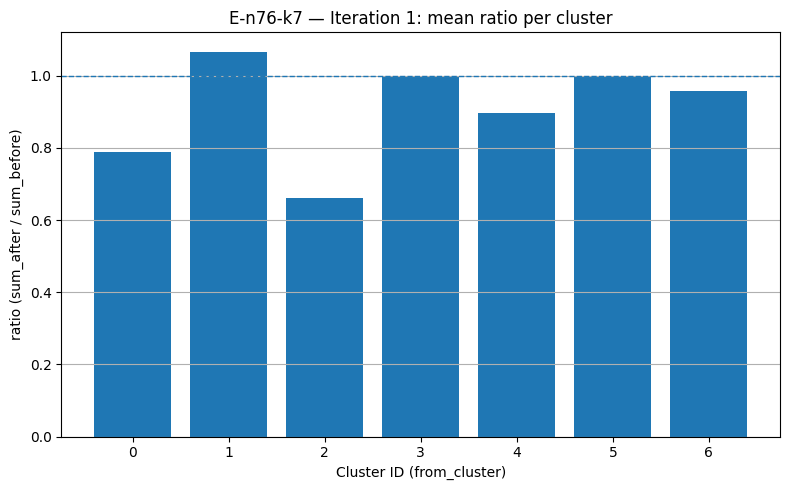

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k7_iter1.png


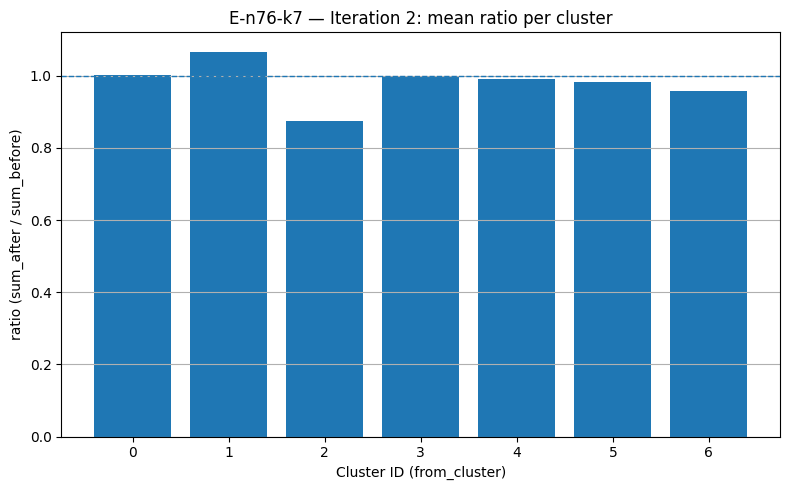

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k7_iter2.png


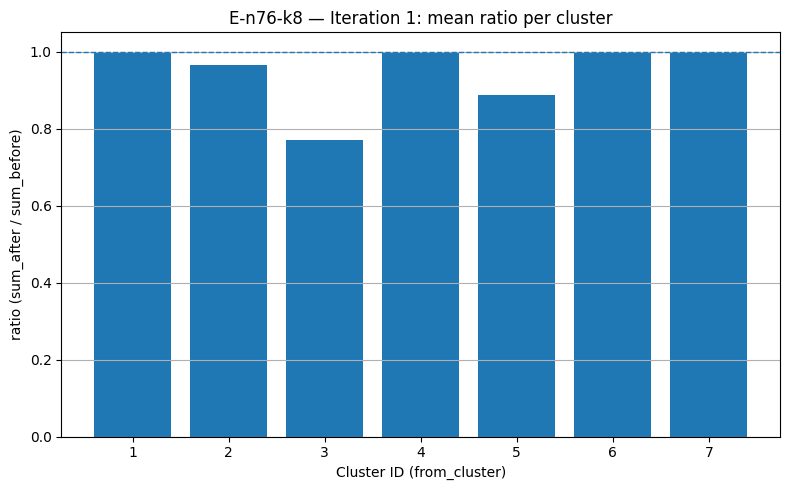

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k8_iter1.png


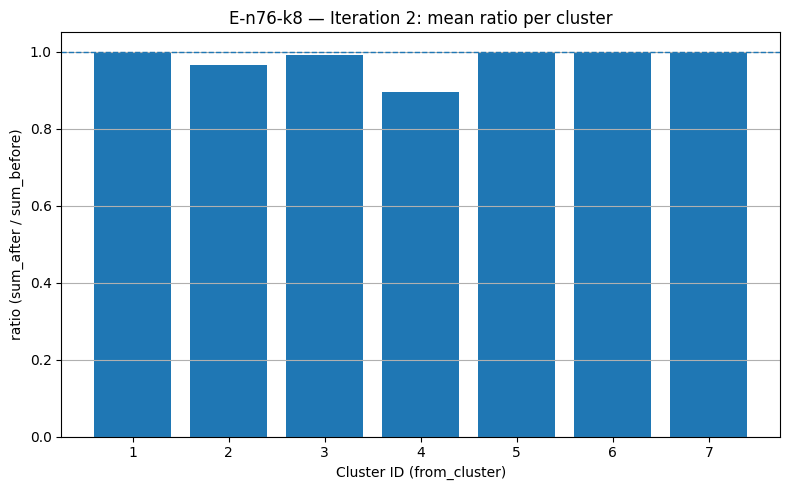

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k8_iter2.png


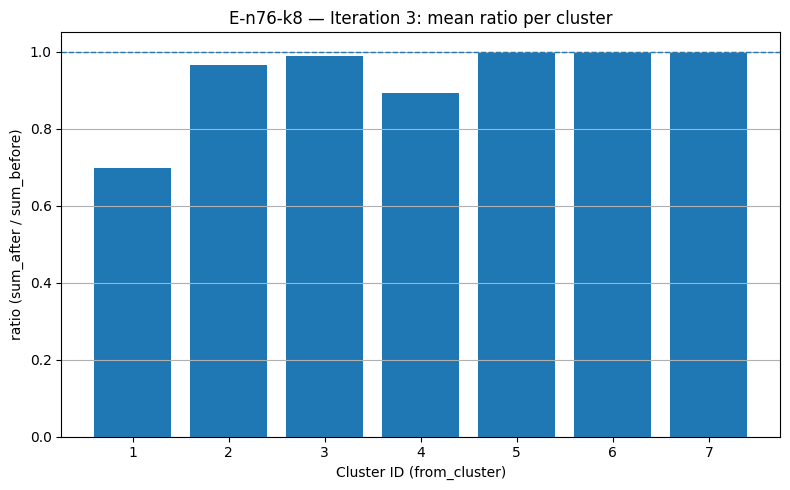

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k8_iter3.png


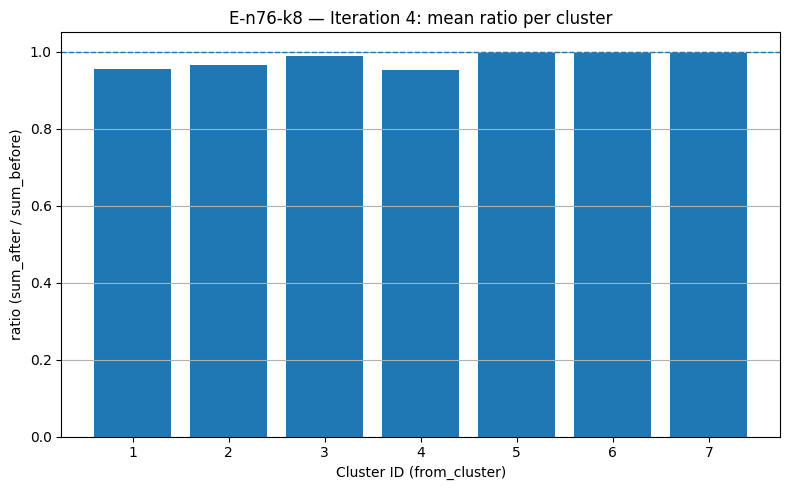

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k8_iter4.png


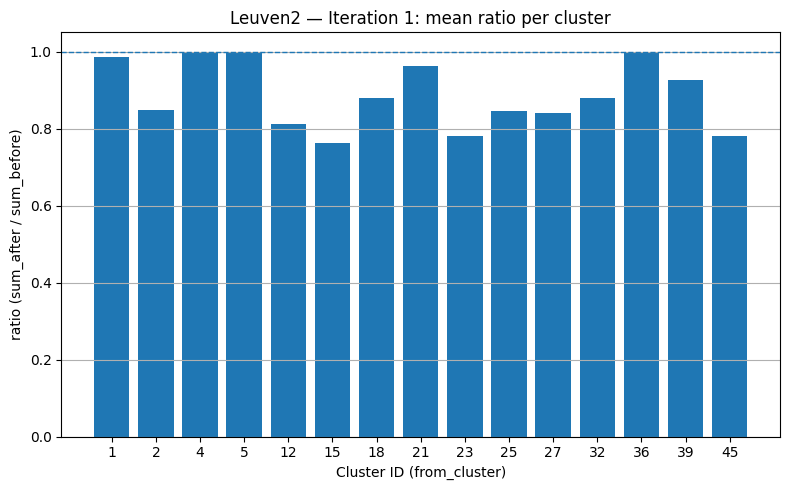

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter1.png


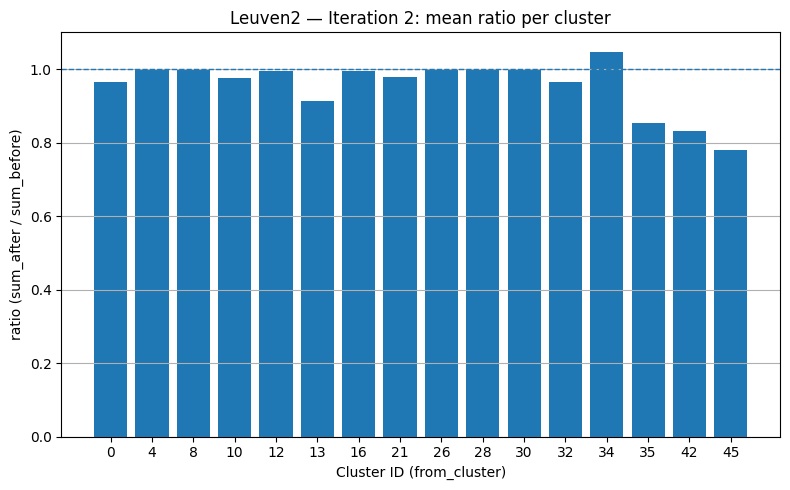

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter2.png


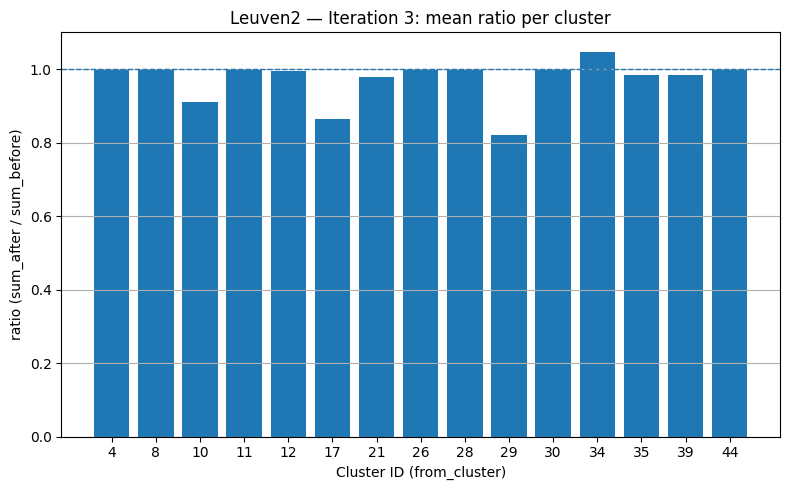

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter3.png


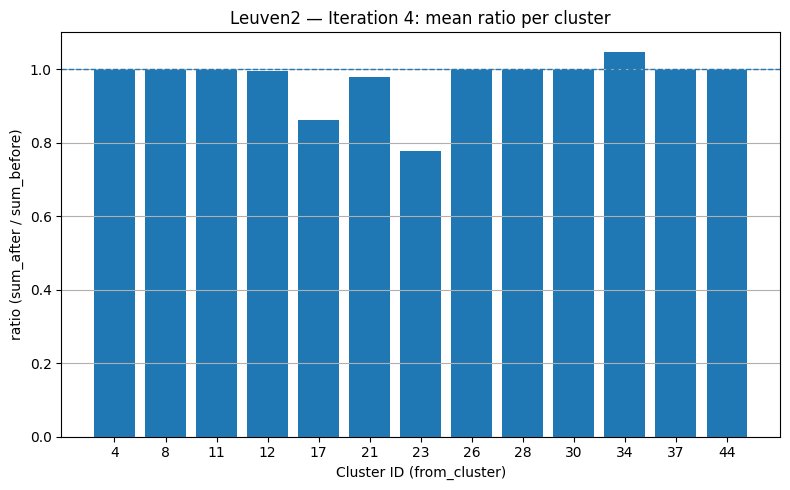

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter4.png


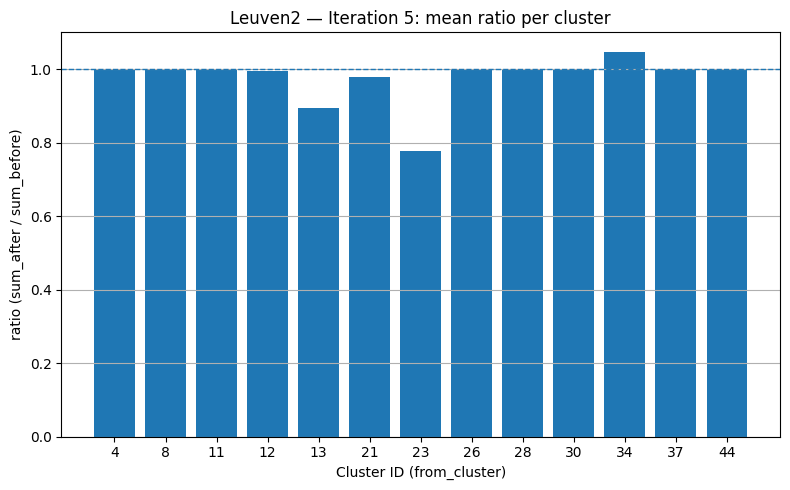

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter5.png


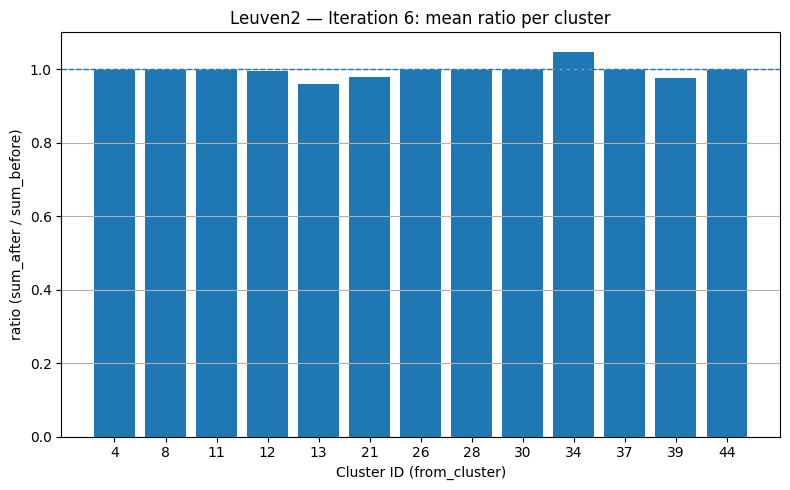

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter6.png


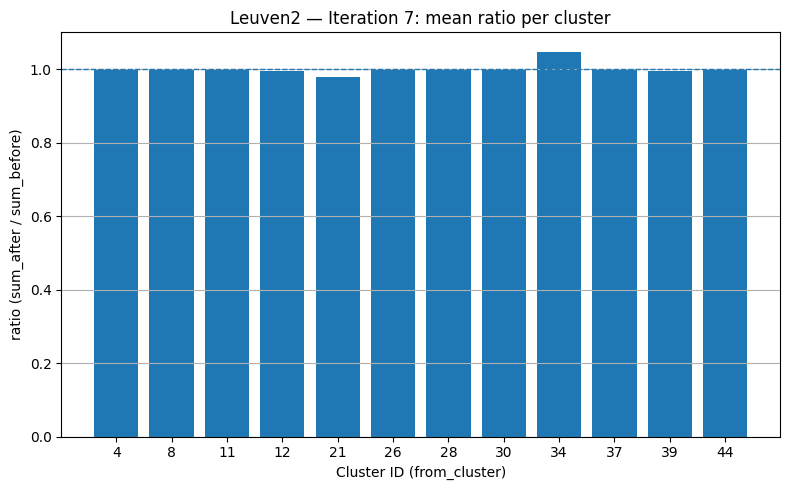

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_Leuven2_iter7.png


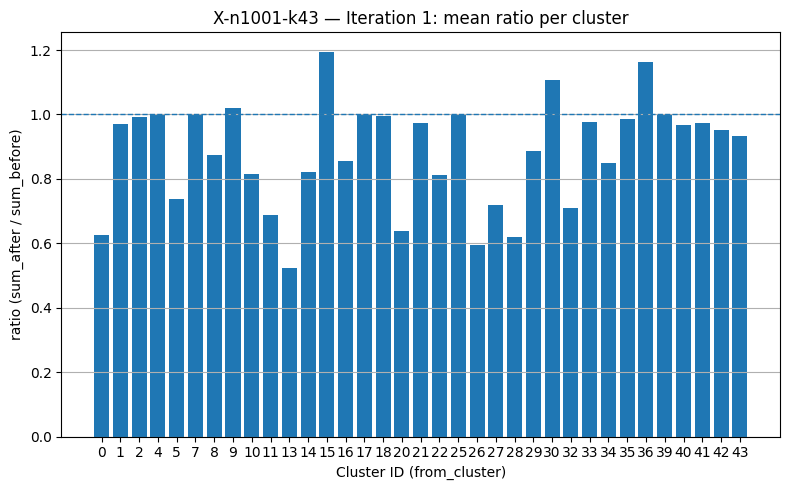

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter1.png


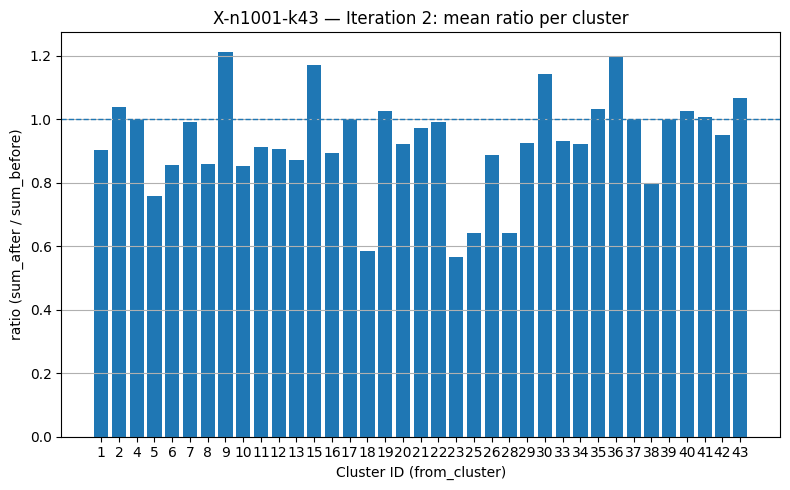

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter2.png


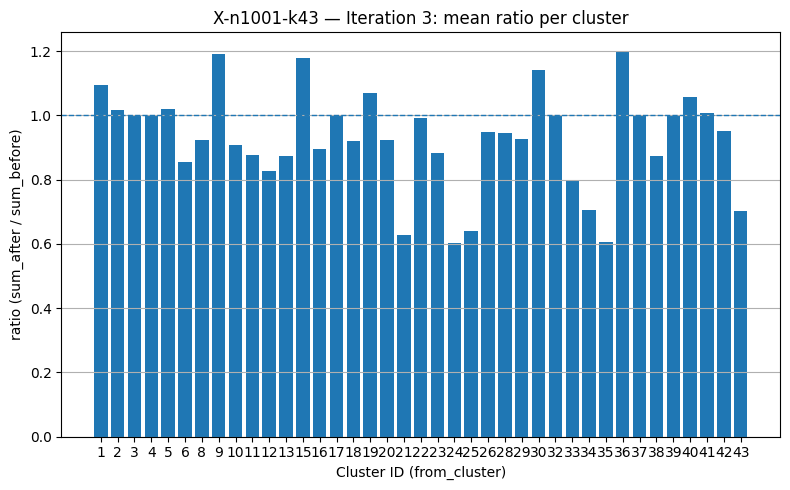

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter3.png


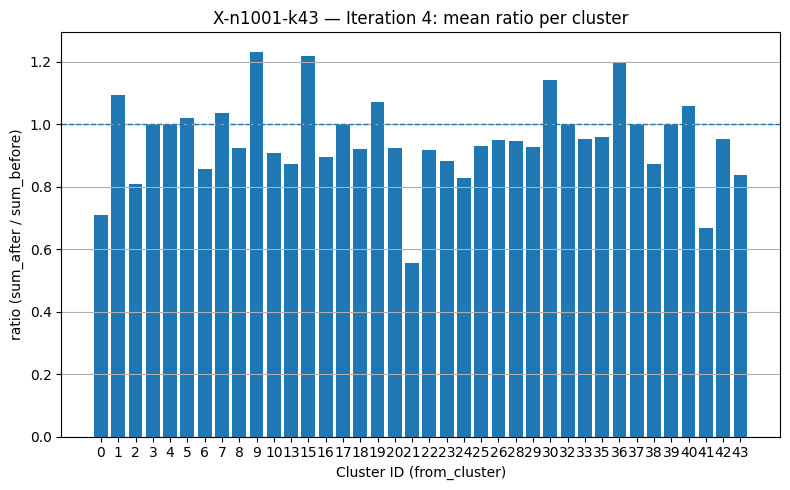

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter4.png


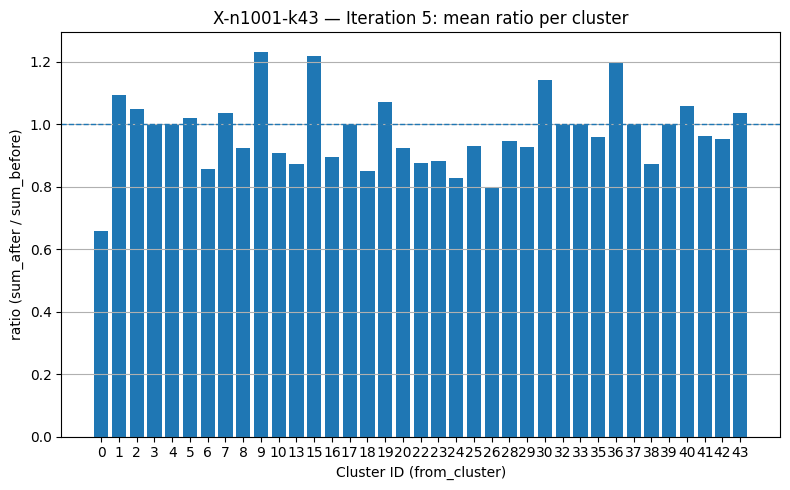

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter5.png


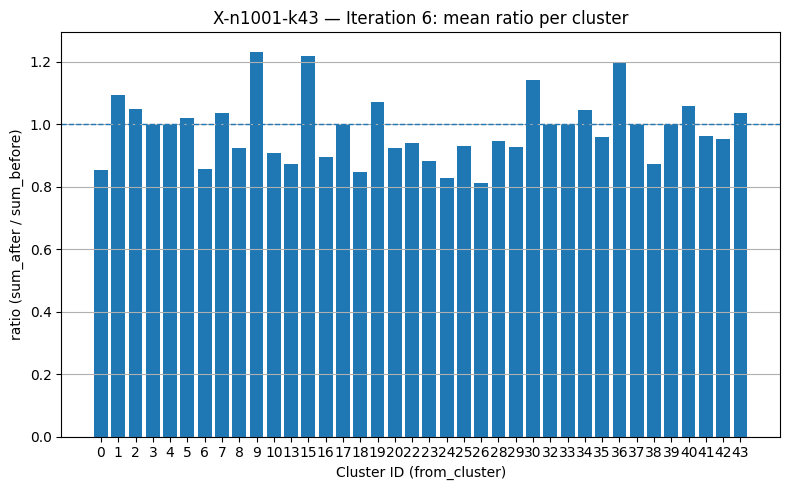

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter6.png


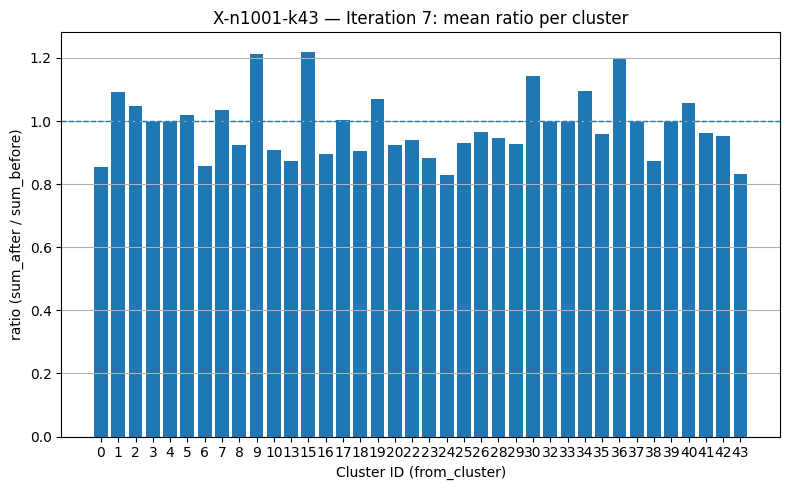

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter7.png


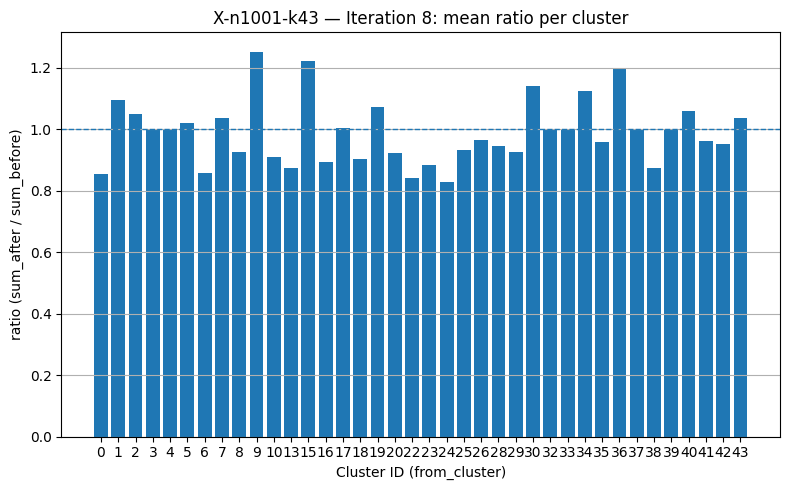

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter8.png


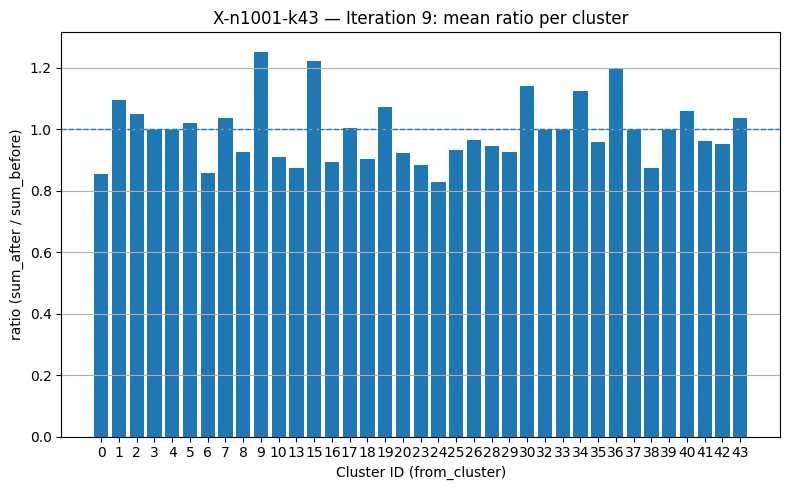

💾 Saved: /home/toshiya1048/dev/QA_knap/out/ex8/bars_X-n1001-k43_iter9.png


['/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter1.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter2.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter3.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter4.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k14_iter5.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter1.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter2.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n101-k8_iter3.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter1.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter2.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n51-k5_iter3.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter1.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter2.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k10_iter3.png',
 '/home/toshiya1048/dev/QA_knap/out/ex8/bars_E-n76-k14_iter1

In [ ]:
# --- データ読み込みとプロット実行 ---

BASE_DIRS = ["/home/toshiya1048/dev/QA_knap/out/ex8"]   # ← 必要に応じて変更
SINGLE_FILES = []                                       # 単体ならここに指定


files = find_swap_files(BASE_DIRS, SINGLE_FILES)
print("検出ファイル数:", len(files))

df = load_rows(files)
print("行数:", len(df))
display(df.head())

plot_bars_per_instance_iteration(df, PLOT_DIR)
